In [1]:
import pandas as pd

train = pd.read_csv('sales_train_v2.csv')

In [2]:
import datetime, nltk
import numpy as np
import sklearn

In [3]:
test = pd.read_csv('test.csv')
items = pd.read_csv('items.csv')
items_category = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

print('train: ',train.shape, 'test: ', test.shape)

train:  (2935849, 6) test:  (214200, 3)


In [4]:
[c for c in train.columns if c not in test.columns]

['date', 'date_block_num', 'item_price', 'item_cnt_day']

In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
feature_count = 25
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(max_features=feature_count)

In [8]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
item_name_list = items['item_name']

In [10]:
item_name_list

0                ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D
1        !ABBYY FineReader 12 Professional Edition Full...
2            ***В ЛУЧАХ СЛАВЫ   (UNV)                    D
3          ***ГОЛУБАЯ ВОЛНА  (Univ)                      D
4              ***КОРОБКА (СТЕКЛО)                       D
5        ***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)         ...
6                 ***УДАР ПО ВОРОТАМ (UNI)               D
7               ***УДАР ПО ВОРОТАМ-2 (UNI)               D
8                 ***ЧАЙ С МУССОЛИНИ                     D
9            ***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D
10               *ЗА ГРАНЬЮ СМЕРТИ                       D
11               *ЛИНИЯ СМЕРТИ                           D
12                         *МИХЕЙ И ДЖУМАНДЖИ  Сука любовь
13               *СПАСАЯ ЭМИЛИ                           D
14               *ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D
15                  //АДРЕНАЛИН: ОДИН ПРОТИВ ВСЕХ (Регион)
16                              //МОНГОЛ С.Бодров (Регио

In [11]:
tfidf.fit_transform(item_name_list)

<22170x25 sparse matrix of type '<class 'numpy.float64'>'
	with 28291 stored elements in Compressed Sparse Row format>

In [12]:
txt_features = pd.DataFrame(tfidf.fit_transform( item_name_list).toarray())

In [13]:
cols = txt_features.columns

In [14]:
cols

RangeIndex(start=0, stop=25, step=1)

In [15]:
for i,j in zip(items['item_name'],items['item_name'].map(len)):
    print(i, '--',j)

! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D -- 41
!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия] -- 68
***В ЛУЧАХ СЛАВЫ   (UNV)                    D -- 45
***ГОЛУБАЯ ВОЛНА  (Univ)                      D -- 47
***КОРОБКА (СТЕКЛО)                       D -- 43
***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D -- 51
***УДАР ПО ВОРОТАМ (UNI)               D -- 40
***УДАР ПО ВОРОТАМ-2 (UNI)               D -- 42
***ЧАЙ С МУССОЛИНИ                     D -- 40
***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D -- 45
*ЗА ГРАНЬЮ СМЕРТИ                       D -- 41
*ЛИНИЯ СМЕРТИ                           D -- 41
*МИХЕЙ И ДЖУМАНДЖИ  Сука любовь -- 31
*СПАСАЯ ЭМИЛИ                           D -- 41
*ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D -- 41
//АДРЕНАЛИН: ОДИН ПРОТИВ ВСЕХ (Регион) -- 38
//МОНГОЛ С.Бодров (Регион) -- 26
//НЕ ОСТАВЛЯЮЩИЙ СЛЕДА (Регион) -- 31
/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/               D -- 41
/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72 -- 25
/ОДНАЖДЫ В КИТАЕ-2 -- 18
/ПОСЛЕДНИЙ ШАНС -

1С:Аудиотеатр. Хрестоматия по литературе. 1 класс. Digipack -- 59
1С:Аудиотеатр. Чехов А.П. Дуэль [Цифровая версия] -- 49
1С:Библ. разработчика. Разработка сложных отчетов в 1С:Предпр. 8. Сист. комп. данных. 2 изд .(+CD) -- 98
1С:Бизнес-курс. Анализ финансовой отчетности. Финансовое планирование и бюджетирование -- 86
1С:Бизнес-курс. Как начать и развивать свое дело -- 48
1С:Бизнес-курс. Охрана труда на предприятиях малого бизнеса -- 59
1С:Бизнес-курс. Переговоры без проигравших -- 42
1С:Бизнес-курс. Продажи - на максимум! -- 38
1С:Биологический конструктор 1.5 [PC, Цифровая версия] -- 54
1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд 4. Гартвич А. -- 59
1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд 5. Гартвич А. -- 59
1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд 6. Гартвич А. -- 59
1С:Бухгалтерия 8 КОРП: учет в головной организации. Власова М.А., Харитонов С.А. -- 80
1С:Бухгалтерия 8 ПРОФ на 5 польз. Поставка для розничного распространения (USB) -- 79
1С:Бухгалтерия 8 ПРОФ на 5 польз.

1С:Предприниматель 8 -- 20
1С:Предприниматель 8 + MS Office SBB -- 36
1С:Предприятие 8. Управление торговыми операциями в вопросах и ответах", 7 издание  [Цифровая версия] -- 101
1С:Предприятие 8. Управление торговыми операциями в вопросах и ответах, 3 издание [Цифровая версия] -- 99
1С:Предприятие 8.1. Практическое пособие разработчика [Цифровая версия] -- 71
1С:Предприятие 8.1. Простые примеры разработки [Цифровая версия] -- 64
1С:Предприятие 8.2. Коротко о главном [Цифровая версия] -- 55
1С:Предприятие 8.2. Коротко о главном. Новые возможности версии 8.2. Радченко М.Г.(+CD) -- 87
1С:Предприятие 8.2. Практическое пособие разработчика. Примеры и типовые приемы [Цифровая версия] -- 97
1С:Предприятие 8.2. Практическое пособие разработчика. Радченко М.Г., Хрусталева Е.Ю. (+CD) -- 91
1С:Предприятие 8.3. Практическое пособие разработчика. Примеры и типовые приемы [Цифровая версия] -- 97
1С:Предприятие 8.3. Практическое пособие разработчика. Радченко М.Г., Хрусталева Е.Ю. (+CD) -- 91
1С:Реп

ARABESQUE  Caballero  Deluxe Edition  LP -- 40
ARABESQUE  City Cats  Deluxe Edition  LP -- 40
ARABESQUE  Friday Night  Deluxe Edition  LP -- 43
ARABESQUE  Marigot Bay  Deluxe Edition  LP -- 42
ARABESQUE  Midnight Dancer  Deluxe Edition  LP -- 46
ARMIN VAN BUUREN  A State Of Trance  2004-2009  Limited Edition  12CD -- 69
ARMIN VAN BUUREN  A State Of Trance  Year Mix  2011  2CD (digipack) -- 67
ARMIN VAN BUUREN  A State Of Trance  Year Mix  2012  2CD (digipack) -- 67
ARMIN VAN BUUREN  A State Of Trance  Year Mix  2013  2CD (digipack) -- 67
ARMIN VAN BUUREN  A State Of Trance 2012  2CD (digipack) -- 56
ARMIN VAN BUUREN  A State Of Trance 2013  2CD (digipack) -- 56
ARMIN VAN BUUREN  A State Of Trance 2014  2CD (digipack) -- 56
ARMIN VAN BUUREN  A State Of Trance 2015  2CD -- 45
ARMIN VAN BUUREN  A Year With Armin Van Buuren  DVD -- 51
ARMIN VAN BUUREN  Intense  The More Intense Edition  2CD (digipack) -- 67
ARMIN VAN BUUREN  Intense (digipack) -- 36
ARMIN VAN BUUREN  Mirage -- 24
ARMIN VAN

Batman: Arkham Origins. Blackgate [PS Vita, русские субтитры] -- 61
Batman: Arkham Origins. Cold, Cold Hear (дополнение) [PC, Цифровая версия] -- 74
Batman: Arkham Origins. Initiation (дополнение) [PC, Цифровая версия] -- 69
Batman: Arkham Origins. Season Pass [PC, Цифровая версия] -- 57
Batman: Аркхем Сити (с поддержкой 3D) (Classics) [Xbox 360, русские субтитры] -- 77
Batman: Аркхем Сити (с поддержкой 3D) [PC, Jewel, русские субтитры] -- 67
Batman: Аркхем Сити (с поддержкой 3D) [PS3, русские субтитры] -- 61
Batman: Аркхем Сити (с поддержкой 3D) [Xbox 360, русские субтитры] -- 66
Batman: Аркхем Сити (с поддержкой 3D) – версия для Steam [PC, Jewel, русские субтитры] -- 86
Batman: Аркхем Сити Day One Edition (с поддержкой 3D) [PS3, русские субтитры] -- 77
Batman: Аркхем Сити Day One Edition. Специальное издание для 1С Интерес (с поддержкой 3D) [PS3, русс -- 100
Batman: Аркхем Сити. Коллекц. издание. Спец.изд. для 1С Интерес (с поддержкой 3D) [PC, русские субт] -- 100
Batman: Аркхем Сити

Call of Duty: Advanced Warfare. Day Zero Edition [PS3, русская версия] -- 70
Call of Duty: Advanced Warfare. Day Zero Edition [PS4, русская версия] -- 70
Call of Duty: Advanced Warfare. Day Zero Edition [Xbox 360, русская версия] -- 75
Call of Duty: Advanced Warfare. Day Zero Edition [Xbox One, русская версия] -- 75
Call of Duty: Advanced Warfare. Digital Pro Edition (Игра + Season Pass) [PC, Цифровая версия] -- 94
Call of Duty: Advanced Warfare. Pre-sell на Day Zero Edition для PC -- 67
Call of Duty: Advanced Warfare. Pre-sell на Day Zero Edition для PS3/PS4/Xbox360/XboxONE -- 88
Call of Duty: Advanced Warfare. Season Pass [PC, Цифровая версия] -- 65
Call of Duty: Black Ops (c поддержкой 3D) (Classics) [Xbox 360, русская версия] -- 79
Call of Duty: Black Ops (c поддержкой 3D) (Platinum) [PS3, русская версия] -- 74
Call of Duty: Black Ops Declassified [PS Vita, русская версия] -- 62
Call of Duty: Black Ops Hardened Edition (c поддержкой 3D) [PS3, английская версия] -- 83
Call of Duty: 

DION CELINE  Sans Attendre -- 26
DION CELINE  Taking Chances -- 27
DIRE STRAITS  Alchemy  Live  DVD -- 32
DIRE STRAITS  Brothers In Arms  20th Anniversary Edition -- 56
DIRE STRAITS  Brothers In Arms  2LP -- 35
DIRE STRAITS  Brothers In Arms  LP -- 34
DIRE STRAITS  Dire Straits  LP -- 30
DIRE STRAITS  Sultans Of Swing -- 30
DIRE STRAITS  Sultans Of Swing  Live In Germany  2LP -- 52
DIRE STRAITS  The Best Of  Private Investigation  2LP -- 53
DIRE STRAITS  The Studio Albums 1978-1991  8LP -- 46
DIRE STRAITS & MARK KNOPFLER  The Best Of 2005  2CD -- 51
DIRE STRAITS Sultans Of Swing DVD (Кир.) -- 40
DJ FEEL  Unlimited  2CD (digipack) -- 34
DJ RUDENKO  Парад Наций (фирм.) -- 31
DJ SMASH  Star Tracks -- 21
DJ Samples Library. Euro. Dance vol. 2 (Jewel) -- 46
DJ VINI  Fever -- 14
DJ YANKOVSKI  Foule Sentimentale -- 32
DOMINGO PLACIDO  Moments Of Passion -- 35
DOMINGO PLACIDO  Songs -- 22
DOOM 3 BFG Edition [PS3, английская версия] -- 43
DOOM 3 BFG Edition [Xbox 360, английская версия] -- 48
D

ENYA Celts (фирм.) -- 18
ENYA Shepherd Moons (Фирм.) -- 27
ERA  Classics  1 -- 16
ERA  Classics  2 -- 16
ERA  The Best Of -- 16
ERASURE  Tomorrow`s World -- 25
ESET NOD32 Mobile Security - лицензия на 1 год на 1 мобильное устройство -- 72
ESET NOD32 Smart Security   продление  3 ПК на 1 год  [PC, Цифровая версия] -- 75
ESET NOD32 Smart Security  лицензия 3 ПК на 2 года  [PC, Цифровая версия] -- 73
ESET NOD32 Smart Security  продление 3 ПК на 2 года  [PC, Цифровая версия] -- 74
ESET NOD32 Smart Security (продление 3ПК на 20 месяцев) [PC, Цифровая версия] -- 77
ESET NOD32 Smart Security + расширенный функционал - на 3ПК на 1 год или продление на 20 месяцев -- 96
ESET NOD32 Smart Security - лиц. на 3ПК на 1 год или продление 3ПК на 20 месяце[PC, Цифровая версия] -- 100
ESET NOD32 Smart Security - продление лицензии на 1 год на 3ПК -- 62
ESET NOD32 Smart Security - продление лицензии на 1 год на 3ПК (коробка) -- 72
ESET NOD32 Smart Security Business Edition 1Y RNW for 30 user -- 61
ESET NO

GREGORIAN  Masters Of Chant X  The Final Chapter -- 48
GREGORIAN MASTERS  Chant And Chill -- 34
GRID 2 [PC, Jewel, русская документация] -- 40
GRID 2. Premium Edition [PS3, русская документация] -- 51
GRID 2. Premium Edition [Xbox 360, русская документация] -- 56
GRID Autosport [PC, Цифровая версия] -- 36
GRID Autosport [PS3, русская версия] -- 36
GRID Autosport [Xbox 360, русская версия] -- 41
GRID Autosport. Limited Black Edition [PC, русская версия] -- 58
GRID Autosport. Season Pass [PC, Цифровая версия] -- 49
GRID Reloaded (Essentials) [PS3, английская версия] -- 51
GRID [MAC, Цифровая версия] -- 27
GUANO APES  Bel Air -- 19
GUANO APES  Offline -- 19
GUETTA DAVID  Listen -- 20
GUETTA DAVID  Nothing But The Beat -- 34
GUETTA DAVID  Nothing But The Beat  2CD -- 39
GUETTA DAVID  Nothing But The Beat  2CD (фирм.) -- 47
GUETTA DAVID  Nothing But The Beat  2LP -- 39
GUETTA DAVID  One Love -- 22
GUETTA DAVID  One More Love  2CD -- 32
GUETTA DAVID  Pop Life -- 22
GUETTA, DAVID Guettablaste

Kaspersky Anti-Virus 2013 Russian Edition. 2-Desktop 1 year Base Box -- 68
Kaspersky Anti-Virus 2013 Russian Edition. 2-Desktop 1 year Renewal Card -- 72
Kaspersky Anti-Virus 2014 Russian Edition. 2-Desktop 1 year Base Box -- 68
Kaspersky Anti-Virus 2014 Russian Edition. 2-Desktop 1 year Base Retail Pack[PC, Цифровая версия] -- 97
Kaspersky Anti-Virus 2014 Russian Edition. 2-Desktop 1 year Base [PC, Цифровая версия] -- 86
Kaspersky Anti-Virus 2014 Russian Edition. 2-Desktop 1 year Renewal Card -- 72
Kaspersky Anti-Virus 2014 Russian Edition. 2-Desktop 1 year Renewal Retail Pack[PC, Цифровая версия] -- 100
Kaspersky Anti-Virus 2014 Russian Edition. 2-Desktop 1 year Renewal [PC, Цифровая версия] -- 89
Kaspersky Anti-Virus 2015 Russian Edition. 2-Desktop 1 year Base Box -- 68
Kaspersky Anti-Virus 2015 Russian Edition. 2-Desktop 1 year Base Download Pack [PC, Цифровая версия] -- 100
Kaspersky Anti-Virus 2015 Russian Edition. 2-Desktop 1 year Base Retail Pack[PC, Цифровая версия] -- 97
Kasp

MICHAEL GEORGE  Songs From The Last Century -- 43
MICHAEL GEORGE  Symphonica -- 26
MICHAEL GEORGE  Symphonica  2LP -- 31
MICHAEL GEORGE Twenty Five  Greatest Videos  2DVD (фирм.) -- 57
MICHAEL, GEORGE Twenty Five DVD+CD -- 34
MIDORI  A Promise Of Angels -- 27
MINECRAFT PAPERCRAFT - Игровой мир "Большой набор" 90 деталей -- 61
MINECRAFT PAPERCRAFT - Игровой мир "Вагонетка и ТНТ" 48 деталей -- 63
MINECRAFT PAPERCRAFT - Игровой мир "Враждебные мобы" 30 деталей -- 63
MINECRAFT PAPERCRAFT - Игровой мир "Дружелюбные мобы" 30 деталей -- 64
MINECRAFT PAPERCRAFT - Игровой мир "Предметы" 30 деталей -- 56
MINECRAFT PAPERCRAFT - Игровой мир "Снежный биом" 48 деталей -- 60
MINECRAFT PAPERCRAFT - Игровой мир "Убежище" 48 деталей -- 55
MINOGUE KYLIE  Aphrodite Les Folies  Live In London  2Blu-Ray -- 61
MINOGUE KYLIE  Kiss Me Once -- 27
MINOGUE KYLIE  Kylie Christmas -- 30
MINOGUE KYLIE  The Best Of -- 26
MOBY  Destroyed -- 15
MOBY  Go - The Very Best Of Moby -- 32
MOBY  Innocents -- 15
MOBY  Innocent

Nanoblock Краб-cкрипач -- 22
Nanoblock Красная электрогитара -- 31
Nanoblock Красноухая черепаха -- 29
Nanoblock Кремлевская ёлка -- 26
Nanoblock Крокодил -- 18
Nanoblock Кролик -- 16
Nanoblock Кукла Дарума -- 22
Nanoblock Лев -- 13
Nanoblock Лиса -- 14
Nanoblock Лошадь -- 16
Nanoblock Медузы -- 16
Nanoblock Морская черепаха -- 26
Nanoblock Набор монотонных кирпичиков -- 37
Nanoblock Набор полупрозрачных кирпичиков -- 41
Nanoblock Набор цветных кирпичиков -- 34
Nanoblock Овца -- 14
Nanoblock Олень -- 15
Nanoblock Остров Пасхи -- 22
Nanoblock Панда -- 15
Nanoblock Паровоз -- 17
Nanoblock Пизанская башня -- 25
Nanoblock Пирамида Хеопса -- 25
Nanoblock Поросенок -- 19
Nanoblock Птица Тукан -- 21
Nanoblock Пудель -- 16
Nanoblock Ретро пикап -- 21
Nanoblock Родстер V6 -- 20
Nanoblock Рождественский домик -- 30
Nanoblock Розовый Фламинго -- 26
Nanoblock Рояль -- 15
Nanoblock Рыба-Клоун -- 20
Nanoblock Рыбы-змеи -- 19
Nanoblock Саграда Фамилия -- 25
Nanoblock Самолет P-51 Мустанг -- 30
Nanobl

PS3: Контроллер игровой беспроводной белый (Dualshock Wireless Controller White: CECH-ZC2E/LW: SCEE) -- 100
PS3: Контроллер игровой беспроводной золотой (Dualshock Wireless Controller Gold Blistered: CECH-ZC2 -- 100
PS3: Контроллер игровой беспроводной камуфляжный (Dualshock Wireless Controller Urban Camouflage Bli -- 100
PS3: Контроллер игровой беспроводной красный (Dualshock Cont RUS TPT Red Blister: CECH-ZC2R/RQ: SCEE -- 100
PS3: Контроллер игровой беспроводной красный (Dualshock Wireless Controller Garnet Red: CECHZC2E: SCEE) -- 103
PS3: Контроллер игровой беспроводной красный (Dualshock Wireless Controller Red Blistered) -- 90
PS3: Контроллер игровой беспроводной красный (Dualshock Wireless Controller Red: CECH-ZC2RDR: SCEE) -- 99
PS3: Контроллер игровой беспроводной прозрачный (Dualshock Wireless Controller Clear Crystal Blister -- 100
PS3: Контроллер игровой беспроводной серебристый (Dualshock Wireless Controller Silver: CECH-ZC2E/SS -- 100
PS3: Контроллер игровой беспроводной с

Resident Evil. Revelations 2 [PC, Jewel, русские субтитры] -- 58
Resident Evil. Revelations 2 [PS3, русские субтитры] -- 52
Resident Evil. Revelations 2 [PS4, русские субтитры] -- 52
Resident Evil. Revelations 2 [Xbox 360, русские субтитры] -- 57
Resident Evil. Revelations 2 [Xbox One, русские субтитры] -- 57
Resident Evil: Operation Raccoon City [PC, Jewel, русские субтитры] -- 67
Resident Evil: Operation Raccoon City [PS3, русские субтитры] -- 61
Resident Evil: Operation Raccoon City [Xbox 360, русские субтитры] -- 66
Resident Evil: Revelations [PC, Jewel, русские субтитры] -- 56
Resident Evil: Revelations [PS3, русские субтитры] -- 50
Resident Evil: Revelations [Xbox 360, русские субтитры] -- 55
Resistance 2 (Essentials) [PS3, русская документация] -- 53
Resistance 3 (Essentials) (с поддержкой PS Move) [PS3, русская версия] -- 70
Resistance 3 (Platinum) (с поддержкой PS Move) [PS3, русская версия] -- 68
Resistance 3 Special Edition [PS3, русская версия] -- 50
Resistance 3. Комплект 

Sniper Elite 2 [PС, Jewel, русская версия] -- 42
Sniper Elite 3 [PC, Цифровая версия] -- 36
Sniper Elite 3 [PC, русская версия] -- 35
Sniper Elite 3 [PS3, русская версия] -- 36
Sniper Elite 3 [PS4, русская версия] -- 36
Sniper Elite 3 [Xbox 360, русская версия] -- 41
Sniper Elite 3 [Xbox One] -- 25
Sniper Elite 3. Season Pass [PC, Цифровая версия] -- 49
Sniper Elite V2 [PC, Цифровая версия] -- 37
Sniper Elite V2 [PC, русская версия] -- 36
Sniper Elite V2 [PS3, русская документация] -- 43
Sniper Elite V2 [Xbox 360, русская документация] -- 48
Sniper Elite V2. Deluxe Edition [PC, Цифровая версия] -- 53
Sniper Elite V2. Game of the Year [PS3, английская версия] -- 58
Sniper Elite V2. Коллекционное издание [PC, русская версия] -- 59
Sniper Elite. Армия тьмы 2 [PC, Jewel, русские субтитры] -- 56
Sniper Elite. Армия тьмы [PC, Jewel, русские субтитры] -- 54
Sniper Elite. Армия тьмы [PC, Цифровая версия] -- 46
SoftOrbits PDF Logo Remover (Удаление логотипов с PDF) ESD [Цифровая версия] -- 76
S

Trackmania Turbo (предзаказ) [PC, Цифровая версия] -- 50
Traffic Inspector GOLD 15-Desktop -- 33
Traffic Inspector GOLD 5-Desktop -- 32
Train Simulator [PC, русская версия] -- 36
Trainz 2012. Твоя железная дорога [PC, Jewel, русская версия] -- 61
Trainz 2012. Твоя железная дорога [PC, русская версия] -- 54
Transformers: Dark of the Moon [PS3, русская документация] -- 58
Transformers: Devastation [PS3, английская версия] -- 50
Transformers: Devastation [PS4, английская версия] -- 50
Transformers: Devastation [Xbox 360, английская версия] -- 55
Transformers: Devastation [Xbox One, английская версия] -- 55
Transformers: Revenge of the Fallen (Essentials) [PSP, английская версия] -- 73
Transformers: Revenge of the Fallen [PS3] -- 41
Tri Pack: Outland. From Dust. Beyond Good & Evil HD [Xbox 360, английская версия] -- 81
Trials Evolution: Gold Edition [PC, Цифровая версия] -- 52
Trials Evolution: Gold Edition [PC, русская версия] -- 51
Trials Fusion [PS4, английская версия] -- 38
Trials Fusi

WARHAMMER ACCESSORIES: Paint Pot: Rhinox Hide арт. 21-22 -- 56
WARHAMMER ACCESSORIES: Paint Pot: Runefang Steel арт. 22-60 -- 59
WARHAMMER ACCESSORIES: Paint Pot: Seraphim Sepia  арт. 24-09 -- 60
WARHAMMER ACCESSORIES: Paint Pot: Ushabti Bone арт. 22-32 -- 57
WARHAMMER ACCESSORIES: Paint Pot: White Scar арт. 22-57 -- 55
WARHAMMER ACCESSORIES: Plastic Glue Thick Global арт. 66-54-99 -- 62
WARHAMMER ACCESSORIES: Space Marine Paint Set арт. 60-35 -- 56
WARHAMMER MINIATURES 40000: Битва за Черный Предел, арт. 40-01-21 -- 65
WARHAMMER MINIATURES 40000: Темная Месть (новая версия) арт. 40-01-21 -- 69
WARHAMMER MINIATURES: Dark Elf Doomfire Warlocks арт. 85-14 -- 59
WARHAMMER MINIATURES: High Elf Dragon Princes of Caledor арт. 87-12 -- 67
WARHAMMER MINIATURES: Lizardmen Saurus Warriors арт. 88-06 -- 58
WARHAMMER MINIATURES: Savage Orcs арт. 89-19 -- 44
WARHAMMER MINIATURES: Stormcast Eternals Liberators арт. 96-10 -- 62
WARHAMMER MINIATURES: Stormcast Eternals Paladins арт. 96-12 -- 60
WARHAM

АГАТА КРИСТИ. ЗАГАДОЧНЫЕ УБИЙСТВА : УБИЙСТВА НА СЕМЕЙНОМ ВЕЧЕРЕ -- 63
АГЕНТ ДЖОННИ ИНГЛИШ (BD) -- 24
АГЕНТ ДЖОННИ ИНГЛИШ (регион) -- 28
АГЕНТ ДЖОННИ ИНГЛИШ. ПЕРЕЗАГРУЗКА  (регион) -- 43
АГЕНТ ДЖОННИ ИНГЛИШ/АГЕНТ ДЖОННИ ИНГЛИШ:ПЕРЕЗАГРУЗКА (2BD) -- 58
АГЕНТ ДЖОННИ ИНГЛИШ: ПЕРЕЗАГРУЗКА -- 33
АГЕНТ ДЖОННИ ИНГЛИШ: ПЕРЕЗАГРУЗКА (BD) -- 38
АГЕНТ ПОД ПРИКРЫТИЕМ -- 20
АГЕНТ ПОД ПРИКРЫТИЕМ (BD) -- 25
АГЕНТ ХАМИЛТОН. ПОХИЩЕННАЯ -- 26
АГЕНТ ХАМИЛЬТОН. В ИНТЕРЕСАХ НАЦИИ -- 34
АГНОЗИЯ -- 7
АГОНИЯ (rem) -- 12
АГУЗАРОВА ЖАННА  Grand Collection -- 33
АГУТИН ЛЕОНИД  Время последних романтиков  CD+DVD (фирм.) -- 57
АГУТИН ЛЕОНИД &  AL DI MEOLA  Cosmopolitan Llife  LP -- 52
АГУТИН ЛЕОНИД, ВАРУМ АНЖЕЛИКА, ПРЕСНЯКОВ ВЛАДИМИР, ПОДОЛЬСКАЯ НАТАЛЬЯ  Быть частью твоего -- 89
АДВОКАТ ДЬЯВОЛА WB -- 18
АДВОКАТ ДЬЯВОЛА WB (регион) -- 27
АДРЕНАЛИН 2: ВЫСОКОЕ НАПРЯЖЕНИЕ (BD) -- 36
АДРЕНАЛИН 2: ВЫСОКОЕ НАПРЯЖЕНИЕ (Регион) -- 40
АДСКИЙ БУНКЕР: ЧЕРНОЕ СОЛНЦЕ -- 28
АДЪЮТАНТ ЕГО ПРЕВОСХОДИТЕЛЬСТВА  Серии 1-5  2DVD -- 48
А

БАРБИ И ПОТАЙНАЯ ДВЕРЬ (BD) -- 27
БАРБИ И ТРИ МУШКЕТЕРА (Регион) -- 30
БАРБИ И ТРИ МУШКЕТЕРА (регион) -- 30
БАРБИ И ХРУСТАЛЬНЫЙ ЗАМОК (Регион) -- 34
БАРБИ И ХРУСТАЛЬНЫЙ ЗАМОК (регион) -- 34
БАРБИ И ЩЕЛКУНЧИК (регион) -- 26
БАРБИ: 12 ТАНЦУЮЩИХ ПРИНЦЕСС (Регион) -- 37
БАРБИ: 12 ТАНЦУЮЩИХ ПРИНЦЕСС (регион) -- 37
БАРБИ: АКАДЕМИЯ ПРИНЦЕСС (регион) -- 33
БАРБИ: БАЛЕРИНА В РОЗОВЫХ ПУАНТАХ -- 33
БАРБИ: ДЮЙМОВОЧКА (регион) -- 26
БАРБИ: ЖЕМЧУЖНАЯ ПРИНЦЕССА -- 26
БАРБИ: ЖЕМЧУЖНАЯ ПРИНЦЕССА (BD) -- 31
БАРБИ: КОЛЛЕКЦИЯ РУСАЛОЧЕК -- 26
БАРБИ: ЛЕБЕДИНОЕ ОЗЕРО (Регион) -- 31
БАРБИ: ЛЕБЕДИНОЕ ОЗЕРО (регион) -- 31
БАРБИ: МАРИПОСА (Регион) -- 24
БАРБИ: МАРИПОСА (регион) -- 24
БАРБИ: МАРИПОСА И ПРИНЦЕССА-ФЕЯ -- 31
БАРБИ: ПРИКЛЮЧЕНИЯ РУСАЛОЧКИ 2 (регион) -- 39
БАРБИ: ПРИНЦЕССА И НИЩЕНКА м/ф (регион) -- 39
БАРБИ: ПРИНЦЕССА И ПОП-ЗВЕЗДА (регион) -- 38
БАРБИ: РОЖДЕСТВЕНСКАЯ ИСТОРИЯ (Регион) -- 38
БАРБИ: СКАЗОЧНАЯ СТРАНА МЕРМЕДИЯ (Регион) -- 41
БАРБИ: СКАЗОЧНАЯ СТРАНА МЕРМЕДИЯ (регион) -- 41
БАРБИ: СКАЗОЧНАЯ С

БУХ.1С, №5, МАЙ 2013  [Цифровая версия] -- 39
БУХ.1С, №5, Май  2015 [Цифровая версия] -- 39
БУХ.1С, №5, Май 2012 Бух.е/м [Цифровая версия] -- 46
БУХ.1С, №5, Май 2014 [Цифровая версия] -- 38
БУХ.1С, №6, Июнь  2015 [Цифровая версия] -- 40
БУХ.1С, №6, Июнь 2013 [Цифровая версия] -- 39
БУХ.1С, №6, Июнь 2014 [Цифровая версия] -- 39
БУХ.1С, №7 Июль  2015 [Цифровая версия] -- 39
БУХ.1С, №7, Июль 2013 [Цифровая версия] -- 39
БУХ.1С, №7, Июль 2014 [Цифровая версия] -- 39
БУХ.1С, №8 Август  2015 [Цифровая версия] -- 41
БУХ.1С, №8, Август 2012 Бух.е/м "БУХ.1С", N 8, август  2012 -- 59
БУХ.1С, №8, Август 2013 [Цифровая версия] -- 41
БУХ.1С, №8, Август 2014 [Цифровая версия] -- 41
БУХ.1С, №9  Сентябрь  2015 [Цифровая версия] -- 44
БУХ.1С, №9, Сентябрь 2012 Бух.е/м [Цифровая версия] -- 51
БУХ.1С, №9, Сентябрь 2013 [Цифровая версия] -- 43
БУХ.1С, №9, Сентябрь 2014 [Цифровая версия] -- 43
БЫЛА ЛЮБОВЬ 2 -- 13
БЫСТРЕЕ ПУЛИ -- 12
БЫСТРЕЕ ПУЛИ (регион) -- 21
БЫСТРЕЕ, ЧЕМ КРОЛИКИ -- 20
БЫСТРЕЕ, ЧЕМ КРОЛИКИ

ВВС:ВЫДАЮЩИЕСЯ ЖИВОТНЫЕ-4 -- 25
ВВС:ВЫДАЮЩИЕСЯ ЖИВОТНЫЕ-5 -- 25
ВВС:ГАЛАПАГОСЫ (BD) -- 19
ВВС:ГАНГ (BD) -- 13
ВВС:ГАНГ+ГАЛАПАГОСЫ (2BD) -- 25
ВВС:ГИТЛЕР (3DVD) -- 17
ВВС:ГЛАДИАТОРЫ ВТОРОЙ МИРОВОЙ ВОЙНЫ (4dvd) -- 42
ВВС:ГЛОБАЛЬНЫЕ ВОПРОСЫ ЧЕЛОВЕЧЕСТВА (3 DVD) -- 43
ВВС:ГОЛУБАЯ ПЛАНЕТА (4dvd). -- 27
ВВС:ДЕЛЬФИНЫ-МОРСКИЕ СПАСАТЕЛИ -- 30
ВВС:ДИКИЕ ВОДОПАДЫ -- 18
ВВС:ДИКИЕ МАМЫ И МАЛЫШИ -- 23
ВВС:ДИКИЙ КИТАЙ (2BD) -- 21
ВВС:ЖИВАЯ ПЛАНЕТА (4DVD). -- 25
ВВС:ЖИЗНЬ (4BD) -- 15
ВВС:ЖИЗНЬ (5DVD) -- 16
ВВС:ЖИЗНЬ В ДИКИХ МЕСТАХ (3 DVD) -- 32
ВВС:ЖИЗНЬ В ДИКИХ МЕСТАХ-3 -- 26
ВВС:ЖИЗНЬ В МИКРОМИРЕ(2dvd). -- 28
ВВС:ЖИЗНЬ ЛЬВОВ -- 15
ВВС:ЖИЗНЬ С ХОЛОДНОЙ КРОВЬЮ (2DVD) -- 34
ВВС:ЖИЗНЬ Ч.1 (BD) -- 18
ВВС:ЖИЗНЬ Ч.2 (BD) -- 18
ВВС:ЖИЗНЬ Ч.3 (BD) -- 18
ВВС:ЖИЗНЬ Ч.4 (BD) -- 18
ВВС:ЖИТЕЛИ ОКЕАНОВ 4 -- 20
ВВС:ЗАГАДОЧНЫЕ ЖИВОТНЫЕ (3 DVD) -- 31
ВВС:ЗАМЕРЗШАЯ ПЛАНЕТА (3 DVD) -- 29
ВВС:ЗАМЕРЗШАЯ ПЛАНЕТА-1 -- 23
ВВС:ЗАМЕРЗШАЯ ПЛАНЕТА-3 -- 23
ВВС:ЗАПОВЕДНИК БЕН-ЭЙ -- 21
ВВС:ЗЕМЛЯ: МОЩЬ ПЛАНЕТЫ (2BD) -- 29
ВВС:ЗЕМЛЯ

ВОЗВРАЩЕНИЕ ГЕРОЯ (BD) -- 22
ВОЗВРАЩЕНИЕ ГЕРОЯ (регион) -- 26
ВОЗВРАЩЕНИЕ ДОМОВЁНКА м/ф (Регион) -- 34
ВОЗВРАЩЕНИЕ СУПЕРМЕНА (регион) -- 30
ВОЗДУШНАЯ ТЮРЬМА (BD) -- 21
ВОЗДУШНАЯ ТЮРЬМА/ПЕРЛ-ХАРБОР (BD) -- 33
ВОЗДУШНЫЙ МАРШАЛ -- 16
ВОЗДУШНЫЙ МАРШАЛ (BD) -- 21
ВОЗДУШНЫЙ МАРШАЛ (регион) -- 25
ВОЗМЕЗДИЕ (BD) -- 14
ВОЗМЕЗДИЕ ЭРПА -- 14
ВОЗМЕЩЕНИЕ УЩЕРБА WB (регион) -- 29
ВОИН -- 4
ВОИН (PAR) -- 10
ВОИН (регион) -- 13
ВОИНЫ ДЖУНГЛЕЙ 2 (регион) -- 25
ВОИНЫ СВЕТА (BD) -- 16
ВОИНЫ СВЕТА (Регион) -- 20
ВОЙНА (BD) -- 10
ВОЙНА БОГОВ:БЕССМЕРТНЫЕ (3D BD) -- 31
ВОЙНА БОГОВ:БЕССМЕРТНЫЕ (BD) -- 28
ВОЙНА БОГОВ:БЕССМЕРТНЫЕ (в подарок очки 3D) -- 43
ВОЙНА И МИР  4DVD (rem) -- 23
ВОЙНА И МИР (4DVD) (регион) -- 27
ВОЙНА МИРОВ (регион) -- 20
ВОЙНА МИРОВ Z -- 13
ВОЙНА МИРОВ Z (3D BD) -- 21
ВОЙНА МИРОВ Z (3D BD+BD) -- 24
ВОЙНА МИРОВ Z (BD) -- 18
ВОЙНА МИРОВ. ЗВЕЗДНЫЕ РЕЖИССЕРЫ. СПИЛБЕРГ -- 41
ВОЙНА НЕВЕСТ (BD) -- 17
ВОКЗАЛ ДЛЯ ДВОИХ (rem) -- 22
ВОКЗАЛ ДЛЯ ДВОИХ (Регион) -- 25
ВОЛГА-ВОЛГА (цветной) (регион) -- 

ГОЛОДНЫЙ КРОЛИК АТАКУЕТ (DVD+BD) -- 32
ГОЛОДНЫЙ КРОЛИК АТАКУЕТ (регион) -- 32
ГОЛОСА -- 6
ГОЛОСА 1 ЧАСТЬ (1-9) -- 20
ГОЛУБАЯ БЕЗДНА  (BD) -- 20
ГОЛУБАЯ БЕЗДНА (регион) -- 23
ГОЛЫЕ ПЕРЦЫ -- 11
ГОРА САМОЦВЕТОВ (КОЛЛ.) -- 23
ГОРАЦИО ХОРНБЛАУЭР (8dvd) -- 25
ГОРБУН ИЗ НОТР-ДАМА 1,2  (BD) -- 29
ГОРДОСТЬ И ПРЕДУБЕЖДЕНИЕ (uni Регион.) -- 38
ГОРДОСТЬ И ПРЕДУБЕЖДЕНИЕ (Кармен) -- 33
ГОРНЫЕ МСТИТЕЛИ -- 15
ГОРОД 312  Новая музыка  CD+DVD (фирм.) -- 39
ГОРОД АНГЕЛОВ (BD) -- 18
ГОРОД В ОГНЕ -- 12
ГОРОД ВОРОВ  (регион) WB -- 24
ГОРОД ВОРОВ  WB -- 15
ГОРОД ГЕРОЕВ -- 12
ГОРОД ГЕРОЕВ (3D BD) -- 20
ГОРОД ГЕРОЕВ (BD) -- 17
ГОРОД ГРЕХОВ 2: Женщина, ради которой стоит убивать -- 51
ГОРОД ГРЕХОВ 2: Женщина, ради которой стоит убивать (BD) -- 56
ГОРОД ЖИЗНИ И СМЕРТИ (BD) -- 25
ГОРОД ЗЕРО (BD) -- 15
ГОРОД ЗЕРО (Регион) -- 19
ГОРОДСКАЯ ПОЛИЦИЯ -- 17
ГОРОСКОП НА УДАЧУ -- 17
ГОРЬКИЙ ВКУС СВОБОДЫ. КИНО БЕЗ ГРАНИЦ -- 37
ГОРЬКО! -- 7
ГОРЬКО! (регион) -- 16
ГОРЬКО! 2 -- 9
ГОРЬКО! 2 (BD) -- 14
ГОРЬКО! 2 (регион) -- 18


ДЖАНГО ОСВОБОЖДЕННЫЙ (регион) -- 29
ДЖАСТИН БИБЕР: BELIEVE -- 22
ДЖАСТИН БИБЕР: BELIEVE (регион) -- 31
ДЖАСТИН И РЫЦАРИ ДОБЛЕСТИ -- 25
ДЖАСТИН И РЫЦАРИ ДОБЛЕСТИ (3D BD) -- 33
ДЖАСТИН И РЫЦАРИ ДОБЛЕСТИ (BD) -- 30
ДЖАСТИН И РЫЦАРИ ДОБЛЕСТИ (регион) -- 34
ДЖЕЙ И МОЛЧАЛИВЫЙ БОБ НАНОСЯТ ОТВЕТНЫЙ УДАР -- 43
ДЖЕЙК И ПИРАТЫ НЕТЛАНДИИ: ВОЛШЕБНАЯ КНИГА -- 41
ДЖЕЙК И ПИРАТЫ НЕТЛАНДИИ:ДЖ СПАС «БЫСТРЫЙ» -- 42
ДЖЕЙК И ПИРАТЫ НЕТЛАНДИИ:ДЖЕК-СПАСИТЕЛЬ НЕТЛ -- 44
ДЖЕЙК И ПИРАТЫ НЕТЛАНДИИ:ЙО-ХО,РЕБЯТА,ВПЕРЕД -- 44
ДЖЕЙК И ПИРАТЫ НЕТЛАНДИИ:ПИТ ПЭН ВЕРНУЛСЯ! -- 42
ДЖЕЙК И ПИРАТЫ НЕТЛАНДИИ:СОКРОВИЩЕ -- 34
ДЖЕЙМС БОНД: ГОЛДФИНГЕР (BD) -- 28
ДЖЕЙМС БОНД: ДОКТОР НОУ (BD) -- 28
ДЖЕЙМС БОНД: И ЦЕЛОГО МИРА МАЛО (BD) -- 36
ДЖЕЙМС БОНД: ИЗ РОССИИ С ЛЮБОВЬЮ (BD) -- 37
ДЖЕЙМС БОНД: ЛИЦЕНЗИЯ НА УБИЙСТВО (BD) -- 38
ДЖЕЙМС БОНД: УМРИ, НО НЕ СЕЙЧАС (BD) -- 36
ДЖЕЙМС БОНД: ШАРОВАЯ МОЛНИЯ (BD) -- 32
ДЖЕЙН ЭЙР (BD) -- 14
ДЖЕЙН ЭЙР (Вольга регион) -- 25
ДЖЕЙН ЭЙР (Вольга) -- 18
ДЖЕЙН ЭЙР (регион) -- 18
ДЖЕЙСОН СТЕЙТЕМ. Колл

ЖЕЛЕЗНЫЙ ЧЕЛОВЕК 3 (3D BD+BD) -- 29
ЖЕЛЕЗНЫЙ ЧЕЛОВЕК 3 (BD) -- 23
ЖЕЛЕЗНЫЙ ЧЕЛОВЕК 3 (регион) -- 27
ЖЕЛЕЗНЫЙ ЧЕЛОВЕК И ХАЛК:СОЮЗ ГЕРОЕВ М/Ф -- 39
ЖЕЛЕЗНЫЙ ЧЕЛОВЕК. ТРИЛОГИЯ -- 26
ЖЕЛЕЗЯКИ -- 8
ЖЕНА ПУТЕШЕСТВЕННИКА ВО ВРЕМЕНИ WB (регион) -- 43
ЖЕНИТЬБА (Регион) (лен/фм) -- 26
ЖЕНИТЬБА БАЛЬЗАМИНОВА  (rem) -- 28
ЖЕНИТЬБА БАЛЬЗАМИНОВА (Регион) -- 30
ЖЕНИТЬБА БАЛЬЗАМИНОВА (регион) -- 30
ЖЕНИХ НАПРОКАТ (BD) -- 19
ЖЕНИХ НАПРОКАТ (Парадиз) -- 24
ЖЕНЩИНА В ЧЕРНОМ -- 16
ЖЕНЩИНА В ЧЕРНОМ (BD) -- 21
ЖЕНЩИНА ИЗ 5-ГО ОКРУГА -- 22
ЖЕНЩИНЫ ПРОТИВ МУЖЧИН -- 21
ЖЕНЩИНЫ- АГЕНТЫ -- 15
ЖЕНЫ И ДОЧЕРИ (регион) -- 22
ЖЕНЯ, ЖЕНЕЧКА И КАТЮША (регион) -- 31
ЖЕСТОКАЯ КОЛЛЕКЦИЯ (Челюсти 3D, Крик 4, Центурион, Неприкасаемые) (BD) -- 70
ЖЕСТОКИЙ РОМАНС (rem) -- 21
ЖЕСТОКИЙ РОМАНС (Регион) -- 24
ЖЕСТОКИЙ РОМАНС (регион) -- 24
ЖИВАЯ СТАЛЬ -- 11
ЖИВАЯ СТАЛЬ (BD) -- 16
ЖИВАЯ СТАЛЬ (регион) -- 20
ЖИВАЯ СТАЛЬ/Я-ЧЕТВЕРТЫЙ/НОЧЬ СТРАХА WD (BD) -- 43
ЖИВЕТ ТАКОЙ ПАРЕНЬ  (rem) -- 25
ЖИЗНЬ -- 5
ЖИЗНЬ 3D. ВОДА-ОСНОВА ЖИЗНИ (3D B

ИЗМЕНА (регион) -- 15
ИЗМЕНИ МОЮ ЖИЗНЬ -- 16
ИЗМЕРЯЯ МИР -- 11
ИЗУЧАЯ ПРИРОДУ (3D BD) -- 22
ИИСУС ХРИСТОС – СУПЕРЗВЕЗДА. Коллекция: 1973 Фильм / 2012 Шоу (2BD) -- 67
ИКОНА СЕЗОНА -- 12
ИЛЛЮЗИОНИСТ (регион) -- 20
ИЛЛЮЗИОНИСТ м/ф -- 15
ИЛЛЮЗИЯ ОБМАНА -- 14
ИЛЛЮЗИЯ ОБМАНА (BD) -- 19
ИЛЛЮЗИЯ ОБМАНА (регион) -- 23
ИЛЛЮЗИЯ ПОЛЕТА wd -- 17
ИЛЬЯ МУРОМЕЦ (rem) -- 18
ИЛЬЯ МУРОМЕЦ И СОЛОВЕЙ РАЗБОЙНИК  (BD) -- 38
ИЛЬЯ МУРОМЕЦ И СОЛОВЕЙ РАЗБОЙНИК (мистерия регион) -- 50
ИМОДЖЕН -- 7
ИМПЕРИЯ РОБОТОВ -- 15
ИНДИАНА ДЖОНС (1-4) -- 19
ИНДИАНА ДЖОНС В ПОИСКАХ УТРАЧЕННОГО КОВЧЕГА -- 43
ИНДИАНА ДЖОНС И КОРОЛЕВСТВО ХРУСТАЛЬНОГО ЧЕРЕПА (BD) -- 52
ИНДИАНА ДЖОНС И КОРОЛЕВСТВО ХРУСТАЛЬНОГО ЧЕРЕПА (регион) -- 56
ИНДИАНА ДЖОНС И ПОСЛЕДНИЙ КРЕСТОВЫЙ ПОХОД (регион) -- 50
ИНДИАНА ДЖОНС И ХРАМ СУДЬБЫ -- 27
ИНДИАНА ДЖОНС И ХРАМ СУДЬБЫ (регион) -- 36
ИНДИАНА ДЖОНС. В ПОИСКАХ УТРАЧЕННГО КОВЧЕГА (регион) -- 52
ИНДЮКИ: НАЗАД В БУДУЩЕЕ -- 23
ИНДЮКИ: НАЗАД В БУДУЩЕЕ М/Ф (3D BD) -- 35
ИНДЮКИ: НАЗАД В БУДУЩЕЕ М/Ф (BD) -- 32
И

КИН-ДЗА-ДЗА! (Регион) -- 21
КИНГ КОНГ (BD) -- 14
КИНО  45  LP -- 12
КИНО  Grand Collection  1 -- 25
КИНО  Grand Collection  2 -- 25
КИНО  Группа крови -- 18
КИНО  Группа крови  LP -- 22
КИНО  Звезда по имени Солнце -- 28
КИНО  Звезда по имени Солнце  LP -- 32
КИНО  Коллекция  15CD (box) -- 27
КИНО  Легенды русского рока  1 (фирм.) -- 38
КИНО  Легенды русского рока  2 (фирм.) -- 38
КИНО  Легенды русского рока  2LP -- 32
КИНО  Начальник Камчатки  LP -- 28
КИНО  Новая коллекция  1 -- 24
КИНО  Новая коллекция  2 -- 24
КИНО  Ночь  LP -- 14
КИНО  Последний герой -- 21
КИНО  Последний герой  LP -- 25
КИНО  Черный альбом -- 19
КИНО  Чёрный альбом  LP -- 23
КИНО  Это не любовь  LP -- 23
КИНО ПРО АЛЕКСЕЕВА -- 18
КИНОГИД ИЗВРАЩЕНЦА:ИДЕОЛОГИЯ -- 28
КИПЕЛОВ  X  2CD+2DVD (фирм.) -- 28
КИПЕЛОВ  Жить вопреки -- 21
КИПЕЛОВ  Жить вопреки  CD+DVD (фирм.) -- 37
КИПЕЛОВ  Новая коллекция -- 24
КИПЕЛОВ  Отражение   LP -- 23
КИПЕЛОВ  Отражение (фирм.) -- 26
КИПЕЛОВ  Реки времен  LP -- 24
КИПЕЛОВ  Х  2LP -- 15

КРУГ ИРИНА  Матерая любовь -- 26
КРУГ ИРИНА  Моя королева  Лучшие песни  Легенды жанра -- 53
КРУГ ИРИНА  Остров любви -- 24
КРУГ ИРИНА  Первая осень разлуки -- 32
КРУГ ИРИНА  Снежная королева  LP -- 32
КРУГ ИРИНА  Тебе, моя последняя любовь -- 38
КРУГ ИРИНА  Я прочитаю в глазах твоих -- 37
КРУГ ИРИНА & КОРОЛЕВ ВИКТОР  Букет белых роз -- 44
КРУГ ИРИНА & КОРОЛЕВ ВИКТОР  Городские встечи -- 45
КРУГ ИРИНА DVD -- 14
КРУГ ИРИНА И МИХАИЛ  История любви -- 34
КРУГ МИХАИЛ  20 лучших песен -- 28
КРУГ МИХАИЛ  Grand Collection -- 29
КРУГ МИХАИЛ  Дуэты -- 18
КРУГ МИХАИЛ  Жиган-лимон  LP -- 28
КРУГ МИХАИЛ  Магадан -- 20
КРУГ МИХАИЛ  Мадам  LP -- 22
КРУГ МИХАИЛ  Недопетая песня (фирм.) -- 36
КРУГ МИХАИЛ  Новая коллекция  1 -- 31
КРУГ МИХАИЛ  Новая коллекция  2 -- 31
КРУГ МИХАИЛ  Пацаны  Легенды жанра -- 34
КРУГ МИХАИЛ  Платиновый альбом -- 30
КРУГ МИХАИЛ & ОГОНЁК КАТЯ  Это было вчера -- 41
КРУИЗ  Culture Shock A.L.S.  LP -- 31
КРУИЗ  Легенды русского рока (фирм.) -- 36
КРУПНАЯ РЫБА (BD) -- 17
КРУПНАЯ

Комикс Подростки мутанты ниндзя черепашки Черепашки во времени -- 62
Комикс Потерянная в море -- 24
Комикс Противостояние Том 1 Капитан Шустрик -- 43
Комикс Росомаха Старик Логан -- 28
Комикс Сага Том 1 -- 17
Комикс Сага Том 2 -- 17
Комикс Сага Том 3 -- 17
Комикс Сага Том 4 -- 17
Комикс Секс-преступники Том 1 -- 29
Комикс Скотт Пилигрим Том 1 Скотт Пилигрим и его прекрасная маленькая жизнь -- 75
Комикс Скотт Пилигрим Том 2 Скотт Пилигрим против всего мира -- 60
Комикс Скотт Пилигрим Том 3 Скотт Пилигрим и бесконечная печаль -- 63
Комикс Скотт Пилигрим Том 4 Скотт Пилигрим берется за ум -- 56
Комикс Смертельная красота -- 26
Комикс Смертельно прекрасна -- 27
Комикс Смерть Цена жизни Время жизни -- 36
Комикс Создания ночи -- 20
Комикс Сорвиголова Том 1 -- 24
Комикс Сорвиголова Том 2 -- 24
Комикс Стражи Галактики Том 1 Космические мстители -- 50
Комикс Супермен Action Comics Том 1 Супермен и люди из стали -- 60
Комикс Супермен Бэтмен Том 1 Враги общества -- 43
Комикс Супермен Бэтмен Том 2

ЛАПЛАНДСКИЕ СКАЗКИ сб. м/ф (регион) -- 35
ЛАРГО ВИНЧ 1,2 (BD) -- 19
ЛАРГО ВИНЧ 2. ЗАГОВОР В БИРМЕ (регион) -- 38
ЛАРГО ВИНЧ 2: ЗАГОВОР В БИРМЕ -- 29
ЛАРГО ВИНЧ: НАЧАЛО (Регион) -- 27
ЛАРРИ КРАУН -- 11
ЛАРРИ КРАУН (BD) -- 16
ЛАСКОВЫЙ МАЙ  Новая коллекция -- 29
ЛАСКОВЫЙ МАЙ  Розовый вечер  LP -- 31
ЛАСКОВЫЙ МАЙ / ЛЮБОВЬ В БОЛЬШОМ ГОРОДЕ -- 38
ЛАЭРТСКИЙ АЛЕКСАНДР  Новая коллекция -- 36
ЛВК: ПРОЩАЙ... -- 14
ЛЕВИАФАН -- 8
ЛЕВИАФАН (BD) -- 13
ЛЕВША -- 5
ЛЕВША (BD) -- 10
ЛЕГЕНДА (ХХкатВ) -- 16
ЛЕГЕНДА ЗОРРО (BD) -- 18
ЛЕГЕНДА О КРАСНОМ ОРЛЕ -- 22
ЛЕГЕНДА № 17 (BD+DVD) + Вышибала BD -- 35
ЛЕГЕНДА № 17 (BD+DVD+шайба+автофлаг) -- 36
ЛЕГЕНДА № 17 (DVD+автофлаг) -- 27
ЛЕГЕНДА № 17 (регион) -- 21
ЛЕГЕНДАРНЫЙ -- 11
ЛЕГЕНДЫ PRO  Centr -- 18
ЛЕГЕНДЫ PRO  Centr  2CD (фирм.) -- 31
ЛЕГЕНДЫ PRO  Две стороны одной медали (фирм.) -- 45
ЛЕГЕНДЫ НОЧНЫХ СТРАЖЕЙ  WB (регион) -- 35
ЛЕГЕНДЫ НОЧНЫХ СТРАЖЕЙ WB (BD) -- 30
ЛЕГЕНДЫ О КРУГЕ -- 15
ЛЕГЕНДЫ О ПОЛЕТЕ (3D BD+BD) -- 27
ЛЕГЕНДЫ ОСЕНИ (BD) -- 18
ЛЕГО  ЛИГА СПР

МАКСИМ  Другая реальность  CD+DVD (фирм.) -- 41
МАКСИМ  Одиночка -- 16
МАКСИМ ПЕРЕПЕЛИЦА (регион) -- 26
МАКСИМ ПЕРЕПЕЛИЦА + ПРОВЕРКА НА ДОРОГАХ -- 39
МАКСИМАЛЬНЫЙ СРОК -- 17
МАКСИМАЛЬНЫЙ СРОК (BD) -- 22
МАЛАВИТА -- 8
МАЛАВИТА (BD) -- 13
МАЛАВИТА (регион) -- 17
МАЛЕНА -- 6
МАЛЕНА (BD) -- 11
МАЛЕНЬКИЕ ТРАГЕДИИ  2DVD (rem) -- 30
МАЛЕНЬКИЙ ГИГАНТ БОЛЬШОГО СЕКСА (BD) -- 36
МАЛЕНЬКИЙ ПРИНЦ: ПЛАНЕТА ВЕТРОВ/ПЛАНЕТА МУЗЫКИ -- 46
МАЛЕНЬКИЙ ПРИНЦ: ПЛАНЕТА ВЕТРОВ/ПЛАНЕТА МУЗЫКИ (регион) -- 55
МАЛЕФИСЕНТА -- 11
МАЛЕФИСЕНТА (3D BD) -- 19
МАЛЕФИСЕНТА (BD) -- 16
МАЛЕФИСЕНТА (регион) -- 20
МАЛИКОВ  ДМИТРИЙ  Panacea -- 25
МАЛИКОВ ДМИТРИЙ  25+ -- 20
МАЛИКОВ ДМИТРИЙ  Моя, моя -- 25
МАЛИНИН АЛЕКСАНДР  Grand Collection -- 35
МАЛИНИН АЛЕКСАНДР  Романсы -- 26
МАЛИНИН АЛЕКСАНДР  Романсы  LP -- 30
МАЛИНИН АЛЕКСАНДР  Романсы (Регион) -- 35
МАЛИНИН АЛЕКСАНДР  Я объявляю Вам любовь -- 40
МАЛХОЛЛАНД ДРАЙВ (Регион) -- 25
МАЛЫШ И КАРЛСОН (rem) -- 21
МАЛЫШ, КАРЛСОН И ДРУГИЕ (BD) -- 28
МАЛЫШ, КАРЛСОН И ДРУГИЕ сб.м/ф (Р

МОСТ ЧЕРЕЗ РЕКУ КВАЙ (BD) -- 25
МОСТЫ ОКРУГА МЭДИСОН (регион) -- 29
МОТЕЛЬ -- 6
МОЯ БЕЗУМНАЯ СЕМЬЯ -- 18
МОЯ БЕЗУМНАЯ СЕМЬЯ (BD) -- 23
МОЯ БОЛЬШАЯ ИСПАНСКАЯ СЕМЬЯ -- 27
МРАЧНЫЕ НЕБЕСА -- 14
МРАЧНЫЕ НЕБЕСА (регион) -- 23
МРАЧНЫЕ ТЕНИ -- 12
МРАЧНЫЕ ТЕНИ (BD) -- 17
МРАЧНЫЕ ТЕНИ (регион) -- 21
МСТИТЕЛИ  ЭРА АЛЬТРОНА -- 22
МСТИТЕЛИ  ЭРА АЛЬТРОНА  (3D BD) -- 31
МСТИТЕЛИ  ЭРА АЛЬТРОНА (BD) -- 27
МСТИТЕЛИ (2 BD) -- 15
МСТИТЕЛИ (3D BD+BD) -- 19
МСТИТЕЛИ (регион) -- 17
МСТИТЕЛИ + МСТИТЕЛИ  ЭРА АЛЬТРОНА  2 диска  (3D BD) -- 51
МСТИТЕЛИ + МСТИТЕЛИ  ЭРА АЛЬТРОНА  2DVD -- 39
МСТИТЕЛИ + МСТИТЕЛИ  ЭРА АЛЬТРОНА (2BD) -- 39
МСТИТЕЛИ WD (регион) -- 20
МСТИТЕЛИ+Мстители: Величайшие герои Земли! -- 42
МСТИТЕЛИ. ВСЕГДА ВМЕСТЕ -- 23
МСТИТЕЛИ:ВЕЛИЧ.ГЕРОИ ЗЕМЛИ  Ч.1 (регион) -- 40
МСТИТЕЛИ:ВЕЛИЧ.ГЕРОИ ЗЕМЛИ  Ч.2 (регион) -- 40
МСТИТЕЛИ:ВЕЛИЧ.ГЕРОИ ЗЕМЛИ  Ч.3 (регион) -- 40
МСТИТЕЛИ:ВЕЛИЧ.ГЕРОИ ЗЕМЛИ  Ч.4 (регион) -- 40
МСТИТЕЛИ:ВЕЛИЧ.ГЕРОИ ЗЕМЛИ  Ч.5(регион) -- 39
МСТИТЕЛИ:ВЕЛИЧ.ГЕРОИ ЗЕМЛИ  Ч.6 (регион) -- 40

Мягкая игрушка Minecraft Spider Plush 35см -- 42
Мягкая игрушка Minecraft Squid 7" Осьминог -- 42
Мягкая игрушка Plants vs Zombies Peashooter Plants звук (14см) -- 62
Мягкая игрушка Plants vs Zombies Sunflower звук (14см) -- 54
Мягкая игрушка Plants vs Zombies Zombie звук (27см) -- 51
Мягкая игрушка Plants vs Zombies Zombie звук 40см -- 49
Мягкая игрушка Plants vs Zombies ГорохоСтрел - пулемёт 30см -- 59
Мягкая игрушка Plants vs Zombies ГорохоСтрел 30 см. -- 51
Мягкая игрушка Plants vs Zombies Зомби 50 см. -- 45
Мягкая игрушка Plants vs Zombies Зомби Ковбой 30см -- 50
Мягкая игрушка Plants vs Zombies Зомби Моряк 30см -- 49
Мягкая игрушка Plants vs Zombies Зомби Пират 30см -- 49
Мягкая игрушка Plants vs Zombies Зомби Фараон 30см -- 50
Мягкая игрушка Plants vs Zombies Подсолнух 30см -- 47
Мягкая игрушка Portal Companion Cube -- 36
Мягкая игрушка Regular Show Mordecai Basketball 20см -- 52
Мягкая игрушка Regular Show Mordecai со звуком 25см -- 51
Мягкая игрушка Regular Show Rigby Basketba

НОКАУТ (BD) -- 11
НОКАУТ (СР) -- 11
НОКДАУН wd -- 10
НОЛЬ  Легенды русского рока (фирм.) -- 35
НОЛЬ  Песня о безответной любви к Родине  LP -- 44
НОЛЬ  Полундра!  2LP -- 20
НОЛЬ  Северное буги  LP -- 23
НОЛЬ  Созрела дурь  LP -- 22
НОМЕР 44 -- 8
НОРВЕГИЯ (3D BD) -- 16
НОРВЕЖСКИЙ ЛЕС -- 14
НОРВЕЖСКИЙ ЛЕС (регион) -- 23
НОСКОВ НИКОЛАЙ  Новая коллекция -- 31
НОСКОВ НИКОЛАЙ  По пояс в небе -- 30
НОЧИ В СТИЛЕ БУГИ (регион) -- 26
НОЧНОЙ БЕГЛЕЦ -- 13
НОЧНОЙ БЕГЛЕЦ (BD) -- 18
НОЧНЫЕ СНАЙПЕРЫ  4  LP -- 22
НОЧНЫЕ СНАЙПЕРЫ  4 (фирм.) -- 26
НОЧНЫЕ СНАЙПЕРЫ  Армия 2009 -- 27
НОЧНЫЕ СНАЙПЕРЫ  Выжить вопреки  DVD -- 36
НОЧНЫЕ СНАЙПЕРЫ  Новая коллекция -- 32
НОЧЬ В МУЗЕЕ (1-3) (3 BD) -- 25
НОЧЬ В МУЗЕЕ (BD) -- 17
НОЧЬ В МУЗЕЕ 1-2 (2BD) -- 22
НОЧЬ В МУЗЕЕ 2 (BD) -- 19
НОЧЬ В МУЗЕЕ 2 (кв) (BD) -- 24
НОЧЬ В МУЗЕЕ 3: СЕКРЕТ ГРОБНИЦЫ -- 31
НОЧЬ В МУЗЕЕ 3: СЕКРЕТ ГРОБНИЦЫ (BD) -- 36
НОЧЬ В СУПЕРМАРКЕТЕ -- 19
НОЧЬ В СУПЕРМАРКЕТЕ (BD) -- 24
НОЧЬ ПЕРЕД РОЖДЕСТВОМ+КРАСА НЕНАГЛЯДНАЯ сб. м/ф (регион) -- 56
НОЧЬ С

НеоКуб 216 6мм белый 5950079 -- 28
НеоКуб 216 6мм сталь 5950116 -- 28
НеоКуб 216 6мм черный 5950123 -- 29
НеоКуб Альфа 7мм сталь -- 22
НеоТуб, 5мм, 125 сфер, Зеленый -- 30
НеоТуб, 5мм, 125 сфер, Золото -- 29
НеоТуб, 5мм, 125 сфер, Красный -- 30
НеоТуб, 5мм, 125 сфер, Розовый -- 30
НеоТуб, 5мм, 125 сфер, Серебро -- 30
НеоТуб, 5мм, 125 сфер, Синий -- 28
НеоТуб, 5мм, 125 сфер, Стальной -- 31
НеоТуб, 5мм, 125 сфер, Черный -- 29
Неогам "Лесная нимфа" -- 21
Неогам Монстр "Желтый" -- 22
Неогам Монстр "Зеленый" -- 23
Неогам Монстр "Красный" -- 23
Неогам Монстр "Оранжевый" -- 25
Неогам Монстр "Синий" -- 21
Неогам Монстр "Фиолетовый" -- 26
Неокуб, 5мм, Альфа 216, Голубой -- 31
Неокуб, 5мм, Альфа 216, Зеленый -- 31
Неокуб, 5мм, Альфа 216, Золотой -- 31
Неокуб, 5мм, Альфа 216, Красный -- 31
Неокуб, 5мм, Альфа 216, Серебряный -- 34
Неокуб, 5мм, Альфа 216, Синий -- 29
Неокуб, 5мм, Альфа 216, Стальной -- 32
Неокуб, 5мм, Альфа 216, Черный -- 30
Неокуб, 6мм, Альфа 216, Золотой -- 31
Неокуб, 6мм, Альфа 

Одни из нас. Комплект предварительного заказа [PS3] -- 51
Одни из нас. Обновленная версия [PS4, русская версия] -- 53
Одни из нас. Сезонный пропуск. PSN код активации: дополнение к игре [PS3, русская версия] -- 89
Одни из нас. Специальное издание. Джоэл [PS3, русская версия] -- 61
Одни из нас. Специальное издание. Элли [PS3, русская версия] -- 60
Ожерелье Галадриэль в виде цветка (Хоббит) -- 42
Океан Ельзи  MP3 Play (mp3-CD) (digipack) -- 41
Океан Ельзи (mp3-CD) (Jewel) -- 28
Онлайн-доступ к мат. 10-11кл.по пр: рус яз, алг.,геом.,ист.,биол,х,физ,геогр 1г[PC, Цифровая версия] -- 100
Онлайн-доступ к мат. 10-11кл.по пр: рус яз, алг.,геом.,ист.,биол,х,физ,геогр 3м[PC, Цифровая версия] -- 100
Онлайн-доступ к мат. для 5 кл.по пр: рус яз, матем., ист. естествозн. (на 1 год[PC, Цифровая версия] -- 100
Онлайн-доступ к мат. для 5 кл.по пр: рус яз, матем., ист. естествозн. (на 3 мес[PC, Цифровая версия] -- 100
Онлайн-доступ к мат. для 6 кл.по пр: рус яз, матем., ист. биология (на 1 год) [PC, Цифр

ПОТУСТОРОННЕЕ WB -- 16
ПОХИЩЕНИЕ ФРЕДДИ ХАЙНЕКЕНА -- 26
ПОХИЩЕННАЯ -- 10
ПОХОЖДЕНИЯ БРАВОГО СОЛДАТА ШВЕЙКА -- 33
ПОХОЖДЕНИЯ ИМПЕРАТОРА/ ПОХОЖДЕНИЯ ИМПЕРАТОРА 2 (BD) -- 51
ПОЦЕЛУЙ НА УДАЧУ (BD) -- 21
ПОЦЕЛУЙЧИК (BD) -- 15
ПОЧТАЛЬОН ПЭТ -- 13
ПОЧТАЛЬОН ПЭТ (3D BD) -- 21
ПОЧТИ ЗАМУЖЕМ -- 13
ПОЭЗИЯ -- 6
ПОЮЩИЕ СЕРДЦА  Листья закружат (digipack) -- 41
ПРАВИЛА ВИНОДЕЛОВ -- 17
ПРАВИЛА ВИНОДЕЛОВ (BD) -- 22
ПРАВО НА "ЛЕВО" -- 15
ПРАВО НА ЛЕВО (регион) -- 22
ПРАЗДНИК ВЗАПЕРТИ -- 17
ПРАЗДНИК НОВОГОДНЕЙ ЁЛКИ (+мультфильм в подарок) -- 48
ПРЕВОСХОДСТВО БОРНА (BD) -- 24
ПРЕДЕЛ РИСКА -- 12
ПРЕДЕЛ РИСКА (BD) -- 17
ПРЕДЛОЖЕНИЕ (BD) -- 16
ПРЕДЛОЖЕНИЕ (Регион) -- 20
ПРЕДЛОЖЕНИЕ /СНОВА ТЫ (2 DVD) -- 29
ПРЕДЛОЖЕНИЕ wd -- 14
ПРЕДЛОЖЕНИЕ/КРАСОТКА (BD) -- 25
ПРЕЖДЕ ЧЕМ Я УСНУ -- 17
ПРЕЖДЕ ЧЕМ Я УСНУ (BD) -- 22
ПРЕЗИДЕНТ ЛИНКОЛЬН: ОХОТНИК НА ВАМПИРОВ -- 39
ПРЕЗИДЕНТ ЛИНКОЛЬН: ОХОТНИК НА ВАМПИРОВ (3D BD+BD) -- 50
ПРЕЗИДЕНТ ЛИНКОЛЬН: ОХОТНИК НА ВАМПИРОВ (BD) -- 44
ПРЕКРАСНЫЕ СОЗДАНИЯ -- 19
ПРЕКРАСНЫЕ СОЗДАНИЯ (B

РАПУНЦЕЛЬ  ЗАПУТАННАЯ ИСТОРИЯ (регион) -- 38
РАПУНЦЕЛЬ. ЗАПУТАННАЯ ИСТОРИЯ (3D BD) -- 37
РАПУНЦЕЛЬ. ЗАПУТАННАЯ ИСТОРИЯ (BD) -- 34
РАПУНЦЕЛЬ. ЗАПУТАННАЯ ИСТОРИЯ (BD+DVD) -- 38
РАПУНЦЕЛЬ: ЗАПУТАННАЯ ИСТОРИЯ -- 29
РАПУНЦЕЛЬ: ЗАПУТАННАЯ ИСТОРИЯ. ПРИНЦЕССЫ (регион) -- 49
РАПУНЦЕЛЬ: ЗАПУТАННАЯ ИСТОРИЯ/ПРИНЦЕССА И ЛЯГУШКА/КРАСАВИЦА И ЧУДОВИЩЕ wd 3DVD -- 78
РАСКОЛ -- 6
РАСКОЛЬНИКОВ, БАРБИТУРНЫЙ, SLIM  EP 2013 -- 40
РАСПЛАТА -- 8
РАСПЛАТА  (BD) -- 14
РАСПЛАТА  WB (регион) -- 21
РАСПЛАТА (ХХ) -- 13
РАСПУТИН -- 8
РАСПУТИН (BD) -- 13
РАСПУТИН (регион) -- 17
РАССВЕТ МЕРТВЕЦОВ (BD) -- 22
РАССКАЗЫ -- 8
РАССКАЗЫ (BD) -- 13
РАССКАЗЫ (регион) -- 17
РАСТОРГУЕВ НИКОЛАЙ  55  2CD (фирм.) -- 35
РАТАТУЙ (BD+DVD) -- 16
РАТАТУЙ (регион) -- 16
РАТАТУЙ м/ф (BD) -- 16
РАТАТУЙ м/ф wd -- 14
РЕАЛЬНАЯ БЕЛКА -- 14
РЕАЛЬНАЯ БЕЛКА (3D BD) -- 22
РЕАЛЬНАЯ БЕЛКА (BD) -- 19
РЕАЛЬНАЯ БЕЛКА (регион) -- 23
РЕАЛЬНАЯ ЛЮБОВЬ (BD) -- 20
РЕАЛЬНАЯ ЛЮБОВЬ (Регион) -- 24
РЕАЛЬНАЯ СКАЗКА -- 15
РЕАЛЬНАЯ СКАЗКА (BD) -- 20
РЕАЛЬНЫЕ ПАРНИ -

СБ. Город не спит  Mixed By Dj Nil -- 34
СБ. Город не спит  Mixed By Dj Yankovski -- 40
СБ. Город не спит  Mixed By Nejtrino -- 36
СБ. Город не спит (mp3-CD) (Jewel) -- 34
СБ. Горячая 100  Vol.11  Максимум удовольствия (mp3-CD) (jewel) -- 63
СБ. Горячая 100  Vol.12  Максимум удовольствия (mp3-CD) (jewel) -- 63
СБ. Горячая 100  Vol.13  Максимум удовольствия (mp3-CD) (jewel) -- 63
СБ. Горячая 20-ка  Весна-Лето  2011 -- 35
СБ. Горячая 20-ка  Весна-Лето  2012 -- 35
СБ. Горячая 20-ка  Весна-Лето  2013 -- 35
СБ. Горячая 20-ка  Осень-Зима  2011-2012 -- 40
СБ. Горячая 20-ка  Осень-Зима  2012-2013 -- 40
СБ. Горячая 20-ка  Осень-Зима  2013-2014 -- 40
СБ. Горячая тридцатка  3 (mp3-CD) (jewel) -- 41
СБ. Гуляночка  5 (mp3-CD) (digipack) -- 36
СБ. Давай поговорим -- 19
СБ. Две звезды  Ваенга Елена & Михайлов Стас  (mp3-CD) (jewel) -- 62
СБ. Две звезды  Ваенга Елена & Михайлов Стас  DVD -- 49
СБ. Две звезды  Гулькина Наталья и Суханкина Маргарита & Ласковый май -- 69
СБ. Две звезды  Круг Михаил & Цыг

СМЕРТЬ ШПИОНАМ 3: СКРЫТЫЙ ВРАГ (регион) -- 39
СМЕРТЬ ШПИОНАМ! (Регион) -- 24
СМЕРТЬ ШПИОНАМ. ЛИСЬЯ НОРА -- 26
СМЕРТЬ ШПИОНАМ. УДАРНАЯ ВОЛНА -- 29
СМЕХ И ГОРЕ У БЕЛА МОРЯ (+мультфильм в подарок) -- 47
СМЕШАННЫЕ -- 9
СМЕШАННЫЕ (BD) -- 14
СМЕШАННЫЕ ЧУВСТВА (регион) -- 26
СМЕШАРИКИ  АЗБУКА БЕЗОПАСНОСТИ -- 30
СМЕШАРИКИ  АЗБУКА БЕЗОПАСНОСТИ (регион) -- 39
СМЕШАРИКИ  АЗБУКА ДРУЖЕЛЮБИЯ -- 28
СМЕШАРИКИ  АЗБУКА ЗДОРОВЬЯ -- 26
СМЕШАРИКИ  БАРАШ  ЛУЧШЕЕ -- 24
СМЕШАРИКИ  ВИШНЕВЫЙ САД  КРАСНАЯ КНИГА -- 38
СМЕШАРИКИ  ДЕНЬ КОСМОНАВТИКИ -- 28
СМЕШАРИКИ  ЕЖИК  ЛУЧШЕЕ -- 23
СМЕШАРИКИ  ЕЖИК В ТУМАННОСТИ  ДЕНЬ СМЕХА -- 40
СМЕШАРИКИ  ЗАБЫТАЯ ИСТОРИЯ  СОБЫТИЕ ВЕКА -- 40
СМЕШАРИКИ  ИНДИЙСКИЙ ЧАЙ -- 24
СМЕШАРИКИ  ИНДИЙСКИЙ ЧАЙ  ЭРУДИТ -- 32
СМЕШАРИКИ  ИНКОГНИТО -- 20
СМЕШАРИКИ  КОПАТЫЧ  ЛУЧШЕЕ -- 26
СМЕШАРИКИ  КОСМИЧЕСКАЯ ОДИССЕЯ/МИСС ВСЕЛЕННАЯ -- 45
СМЕШАРИКИ  КРАСНАЯ КНИГА -- 24
СМЕШАРИКИ  КРОШ  ЛУЧШЕЕ -- 23
СМЕШАРИКИ  ЛЕТНИЕ КАНИКУЛЫ (регион) -- 35
СМЕШАРИКИ  ЛОСЯШ  ЛУЧШЕЕ -- 24
СМЕШАРИКИ  ЛУЧШИЕ СЕРИИ  Выпу

СТРАННАЯ ЖИЗНЬ ТИМОТИ ГРИНА -- 27
СТРАННАЯ ЖИЗНЬ ТИМОТИ ГРИНА (BD) -- 32
СТРАННЫЕ РОДСТВЕННИКИ -- 21
СТРАННЫЕ ЧАРЫ -- 13
СТРАСТИ ДОН ЖУАНА -- 17
СТРАСТИ ДОН ЖУАНА (BD) -- 22
СТРАСТИ ДОН ЖУАНА (регион) -- 26
СТРАСТИ ПО ЧАПАЮ -- 16
СТРАСТИ ПО ЧАПАЮ (2DVD) (регион) -- 32
СТРАСТИ ХРИСТОВЫ  (Регион) -- 26
СТРАХ И НЕНАВИСТЬ В ЛАС-ВЕГАСЕ (BD) -- 35
СТРАХОВЩИК -- 10
СТРАХОВЩИК (BD) -- 15
СТРАШИЛЫ  (BD) -- 14
СТРАШНО КРАСИВ (DVD+BD) -- 23
СТРАШНО КРАСИВ (регион) -- 23
СТРЕЛА. Сезон 1 (5 DVD) -- 23
СТРЕЛОК -- 7
СТРЕЛОК (BD) -- 12
СТРЕЛОК (регион) -- 16
СТРИЖ  ID -- 9
СТРИЖ  Игристое -- 15
СТРИНГЕР -- 8
СТРИП ПЛАСТИКА: Начальный уровень -- 33
СТРЯПУХА (регион) -- 17
СТУДИЯ 54 -- 9
СТУКАЧ (BD) -- 11
СТУКАЧ (Парадиз) -- 16
СТУКАЧ (Парадиз) (регион) -- 25
СТУКАЧКА -- 8
СТУКАЧКА (регион) -- 17
СТЫД -- 4
СТЫД (BD) -- 9
СТЮАРТ ЛИТТЛ (регион) -- 21
СУДНАЯ НОЧЬ -- 11
СУДНАЯ НОЧЬ (BD) -- 16
СУДНАЯ НОЧЬ 2 -- 13
СУДНАЯ НОЧЬ 2 (BD) -- 18
СУДЬБА (регион) -- 15
СУДЬЯ -- 5
СУДЬЯ (BD) -- 10
СУДЬЯ (регион) -- 14


Стартрек [Xbox 360, русские субтитры] -- 37
Стендаль  Красное и чёрное (mp3-CD) (Jewel) -- 43
Стивенсон Р.Л.  Приключения принца Флоризеля (mp3-CD) (Jewel) -- 61
Стокер Брэм  Дракула (mp3-CD) (Jewel) -- 37
Стрекоза 2 -- 10
Стругацкие А. и Б.  Град обреченный  2CD (mp3-CD) (Jewel) -- 57
Стругацкие А. и Б.  Лучшие рассказы  1 (mp3-CD) (Jewel) -- 55
Стругацкие А. и Б.  Обитаемый остров  2CD (mp3-CD) (Jewel) -- 58
Стругацкие А. и Б.  Отягощённые злом, или сорок лет спустя (mp3-CD) (Jewel) -- 75
Стругацкие А. и Б.  Понедельник начинается в субботу  Переиздание  Ардис (mp3-CD) (Jewel) -- 89
Стругацкие А. и Б.  Улитка на склоне (mp3-CD) (Jewel) -- 53
Стругацкие А. и Б. Волны гасят ветер (mp3-CD) (Jewel) -- 53
Стругацкие А. и Б. За миллиард лет до конца света  Повесть о дружбе и недружбе (mp3-CD) (Jewel) -- 95
Стругацкие А. и Б. Малыш (mp3-CD) (Jewel) -- 41
Стругацкие А. и Б. Обитаемый остров (mp3-CD) (Jewel) -- 52
Стругацкие А. и Б. Отель у погибшего альпиниста (mp3-CD) (Jewel) -- 64
Стругацк

ТРАНСФОРМЕРЫ ПРАЙМ. Сезон 1, часть 5 -- 36
ТРАНСФОРМЕРЫ+ТРАНСФОРМЕРЫ. МЕСТЬ ПАДШИХ+ТРАНСФОРМЕРЫ 3 -- 54
ТРАНСФОРМЕРЫ+ТРАНСФОРМЕРЫ. МЕСТЬ ПАДШИХ+ТРАНСФОРМЕРЫ 3 (6BD) -- 60
ТРАНСФОРМЕРЫ. БИТВЫ ЗВЕРЕЙ 1 СЕЗОН 1 (регион) -- 45
ТРАНСФОРМЕРЫ: МЕСТЬ ПАДШИХ  (Регион) -- 36
ТРАНСФОРМЕРЫ: МЕСТЬ ПАДШИХ (BD) -- 31
ТРАНСФОРМЕРЫ: ЭПОХА ИСТРЕБЛЕНИЯ -- 31
ТРАНСФОРМЕРЫ: ЭПОХА ИСТРЕБЛЕНИЯ (3D BD) -- 39
ТРАНСФОРМЕРЫ: ЭПОХА ИСТРЕБЛЕНИЯ (3D+2D) (BD) -- 44
ТРАНСФОРМЕРЫ: ЭПОХА ИСТРЕБЛЕНИЯ (BD) -- 36
ТРАУРНЫЙ ЛЕС. КИНО БЕЗ ГРАНИЦ -- 29
ТРЕВОЖНЫЙ ВЫЗОВ -- 15
ТРЕНЕР -- 6
ТРЕНЕР (BD) -- 11
ТРЕНИРОВОЧНЫЙ ДЕНЬ  WB (регион) -- 31
ТРЕТИЙ ЛИШНИЙ -- 13
ТРЕТИЙ ЛИШНИЙ (BD) -- 18
ТРЕТЬЯ ЗВЕЗДА -- 13
ТРЕТЬЯ ПЕРСОНА -- 14
ТРИ БОГАТЫРЯ И ШАМАХАНСКАЯ ЦАРИЦА -- 33
ТРИ БОГАТЫРЯ И ШАМАХАНСКАЯ ЦАРИЦА (BD) -- 38
ТРИ БОГАТЫРЯ И ШАМАХАНСКАЯ ЦАРИЦА (DVD+Книга) -- 45
ТРИ БОГАТЫРЯ И ШАМАХАНСКАЯ ЦАРИЦА (регион) -- 42
ТРИ БОГАТЫРЯ НА ДАЛЬНИХ БЕРЕГАХ -- 31
ТРИ БОГАТЫРЯ НА ДАЛЬНИХ БЕРЕГАХ (3D BD) -- 39
ТРИ БОГАТЫРЯ НА ДАЛЬНИХ БЕРЕГАХ (BD)

УТОМЛЕННЫЕ СОЛНЦЕМ 2. ЦИТАДЕЛЬ (регион) -- 39
УТРАЧЕННЫЙ СИМВОЛ -- 17
УТРЕННЯЯ ЗАРЯДКА ДЛЯ ДЕТЕЙ 4-5 ЛЕТ -- 34
УЦЕЛЕВШИЙ -- 9
УЦЕЛЕВШИЙ (BD) -- 14
УЦЕЛЕВШИЙ (регион) -- 18
УЧЕНИК МАСТЕРА -- 14
УЧЕНИК МАСТЕРА (регион) -- 23
УЧЕНИК ЧАРОДЕЯ (BD) -- 19
УЧЕНИК ЧАРОДЕЯ (регион) -- 23
УЧИМСЯ ГОВОРИТЬ КРАСИВО. ДЛЯ ДЕТЕЙ 3-4 ЛЕТ -- 42
УЧИМСЯ ПЕТЬ: вокальная техника -- 30
УЧИМСЯ СЧИТАТЬ ВМЕСТЕ C ХРЮШЕЙ (Регион) -- 39
УЧИМСЯ СЧИТАТЬ ВМЕСТЕ С ХРЮШОЙ И … (регион) -- 43
УЧИТЕЛЬ АЛЕКСЕЙ КОЛЛЕКЦИЯ (7DVD) -- 32
УЧИТЕЛЬ АНГЛИЙСКОГО -- 19
УЧИТЕЛЬ НА ЗАМЕНУ (BD) -- 22
УЧИТЕЛЬ НА ЗАМЕНУ (DVD+ BD) -- 27
Удавчик Плюшевый: 125см на яйце -- 31
Удавчик Плюшевый: 40см -- 22
Удавчик Плюшевый: 40см  на сердечке -- 35
Удавчик Плюшевый: 40см с магнитом -- 33
Удавчик Плюшевый: 40см. (яйцо пластик) -- 38
Удавчик Плюшевый: 40см. (яйцо ткань) -- 36
Удавчик Плюшевый: 75см. (яйцо пластик) -- 38
Удавчик Плюшевый: 75см. (яйцо ткань) -- 36
Улисс Мур  Ключи от времени  Лавка забытых карт  2CD (mp3-CD) (digipack) -- 72
Уличные

Фигурка Dawn Of The Planet Of The Apes Series 1 Koba 7" -- 55
Фигурка Dawn Of The Planet Of The Apes Series 1 Maurice 7" -- 58
Фигурка Dawn of the Dead Hare Kirshna Zombie 7" -- 47
Фигурка Dc Universe Online Harley Quinn Statue 7.1" -- 51
Фигурка Dead Space series 2 Necro 7" -- 36
Фигурка Despicable Me Hula Minion POP 3.75" -- 43
Фигурка Diablo Diablo POP Games 3.75" -- 37
Фигурка Diablo III Diablo Lord of Terror 7" -- 43
Фигурка Diablo III Shadow Of Diablo 7" -- 38
Фигурка Divergent Series 1 Four 7" -- 34
Фигурка Divergent Series 1 Tris 7" -- 34
Фигурка Duke Nukem Forever 7" -- 29
Фигурка E.T. Series 1 Dress Up 7" -- 33
Фигурка E.T. Series 1 Galactic Friend 7" -- 40
Фигурка E.T. Series 2 Moonlight Ride 7" -- 39
Фигурка E.T. Series 2 Telepathic 7" -- 35
Фигурка Elvis 68 Funko Force (Black Suit) -- 41
Фигурка Elvis Aloha Funko Force -- 31
Фигурка Elvis Aloha Wacky Wobbler -- 33
Фигурка Evil Dead 2 Hero Ash Retro Style Clothed Figure 8" -- 58
Фигурка Far Cry 4 Pagan Min King Of Kyrat 24с

Фигурка Sonic Vinyl Modern Sonic Flocked Exclusive (27см) -- 57
Фигурка South Park Butters Talking Bubble-head 6" -- 49
Фигурка South Park Cartman Talking Bubble-head 6" -- 49
Фигурка South Park Kenny Talking Bubble-head 6" -- 47
Фигурка South Park Mr Hankey Talking Bubble-head 6" -- 51
Фигурка South Park Satan & Sadam Talking Bubble-head Set -- 56
Фигурка South Park Timmy Talking Bubble-head 6" -- 47
Фигурка South Park Zombie Kenny Talking Bubble-head SDCC-2010 6" -- 64
Фигурка Star Wars Bust-Ups Series 3 6-Pack -- 42
Фигурка Star Wars Chewbacca Bobblehead S2 -- 41
Фигурка Star Wars Darth Vader Bobblehead S1 -- 43
Фигурка Star Wars Darth Vader Funko Force -- 41
Фигурка Star Wars Darth Vader POP 3.75" -- 39
Фигурка Star Wars Darth Vader Return of Anakin Skywalker 20см -- 61
Фигурка Star Wars Yoda Bobblehead Series 1 -- 42
Фигурка Star Wars Yoda POP 3,75" -- 32
Фигурка Starcraft Premium Series 1 Jim Raynor 7.5" -- 50
Фигурка Starcraft Premium Series 1 Zeratul 10" -- 46
Фигурка Starcraft

Футболка God Of War Marks Of Kratos L -- 37
Футболка God Of War Marks Of Kratos M -- 37
Футболка Half Life Lambda Logo L -- 32
Футболка Half Life Lambda Logo M -- 32
Футболка Half Life Lambda Logo S -- 32
Футболка Half Life Lambda Logo XL -- 33
Футболка Halo 4 In the Stars черная M -- 37
Футболка Halo 4 In the Stars черная S -- 37
Футболка Halo 4 Savior L -- 24
Футболка Halo 4 Savior XL -- 25
Футболка Halo 4 Savior черная M -- 31
Футболка Halo 4 The Return L -- 28
Футболка Halo 4 The Return XL -- 29
Футболка Halo 4 The Return черная M -- 35
Футболка Halo 4 The Return черная S -- 35
Футболка Hearthstone Rose L -- 27
Футболка Hearthstone Rose M -- 27
Футболка Hearthstone Rose S -- 27
Футболка Hearthstone Rose XL -- 28
Футболка Mass Effect 3 Chrome N7 Logo черная M -- 46
Футболка Mass Effect 3 Chrome N7 Logo черная S -- 46
Футболка Mass Effect 3 Glitch N7 Logo черная L -- 46
Футболка Mass Effect 3 Glitch N7 Logo черная M -- 46
Футболка Mass Effect 3 Glitch N7 Logo черная S -- 46
Футболка 

ЧЕЛОВЕК ИЗ СТАЛИ (3D BD+ BD) + фигурки Супермена и Генерала Зода +3 открытки -- 76
ЧЕЛОВЕК ИЗ СТАЛИ (3D BD+ BD)+3 открытки в s'tin боксе -- 53
ЧЕЛОВЕК ИЗ СТАЛИ (3D BD+BD) (+3D-открытка) -- 42
ЧЕЛОВЕК ИЗ СТАЛИ (BD) (+3D-открытка) -- 36
ЧЕЛОВЕК ИЗ СТАЛИ (BD)+фигурка Супермена +3 открытки -- 51
ЧЕЛОВЕК КУСАЕТ СОБАКУ -- 21
ЧЕЛОВЕК НОЯБРЯ -- 14
ЧЕЛОВЕК НОЯБРЯ (BD) -- 19
ЧЕЛОВЕК ПАУК 5000. ДИКТАТОР МИРА (регион) -- 41
ЧЕЛОВЕК С БУЛЬВАРА КАПУЦИНОВ (rem.) -- 35
ЧЕЛОВЕК С БУЛЬВАРА КАПУЦИНОВ (регион) -- 37
ЧЕЛОВЕК, КОТОРЫЙ ИЗМЕНИЛ ВСЕ -- 28
ЧЕЛОВЕК, КОТОРЫЙ ИЗМЕНИЛ ВСЕ (BD) -- 33
ЧЕЛОВЕК, КОТОРЫЙ ИЗМЕНИЛ ВСЕ (регион) -- 37
ЧЕЛОВЕК, КОТОРЫЙ СМЕЕТСЯ -- 24
ЧЕЛОВЕК, КОТОРЫЙ СМЕЕТСЯ (регион) -- 33
ЧЕЛОВЕК-АМФИБИЯ (BD) -- 20
ЧЕЛОВЕК-АМФИБИЯ (регион) -- 24
ЧЕЛОВЕК-ВОЛК (BD) -- 17
ЧЕЛОВЕК-ВОЛК (регион) -- 21
ЧЕЛОВЕК-ПАУК 1 (BD 4K) -- 22
ЧЕЛОВЕК-ПАУК 1 (ПЕРЕИЗДАНИЕ) (BD) -- 33
ЧЕЛОВЕК-ПАУК 1/2/3 (ПЕРЕИЗДАНИЕ) -- 32
ЧЕЛОВЕК-ПАУК 1/2/3 (ПЕРЕИЗДАНИЕ) (BD) -- 37
ЧЕЛОВЕК-ПАУК 2 (ПЕРЕИЗДАНИЕ) (BD) -- 33
ЧЕЛОВЕ

Шапка Metal Gear Solid V Ground Zeroes FOX -- 42
Шапка Minecraft Creeper Face зеленая L/XL -- 41
Шапка Minecraft Creeper Face зеленая S/M -- 40
Шапка South Park Cartman -- 24
Шапка The Elder Scrolls Online Ourobors -- 39
Шапка Titanfall Beanie -- 22
Шапка Watch Dogs Beanie Skull -- 29
Шар-лабиринт 13 см 100 шагов -- 28
Шар-лабиринт 19 см 138 шагов -- 28
Шар-лабиринт Perplexus Epic (125 барьеров) -- 42
Шар-лабиринт Perplexus Original (100 барьеров) -- 46
Шар-лабиринт Perplexus Rookie (70 барьеров) -- 43
Шар-лабиринт Perplexus TWIST, вращающаяся трасса -- 48
Шар-лабиринт Лабиринтус 13см 100 шагов -- 38
Шар-лабиринт Лабиринтус 19см 138 шагов -- 38
Шар-предсказатель 8 черный -- 26
Шар-предсказатель Футбольный мяч -- 32
Шарф Adventure Time Jake Knitted Version -- 40
Шарф Adventure Time Lady Rainicorn -- 34
Шарф Assassin's Creed With 2 Logos -- 34
Шарф Doctor Who Tardis синий 1,6м -- 33
Шарф Doctor Who цветной 2м -- 26
Шарф Minecraft Creeper -- 22
Шатры и тенты, Фонтаны, Коттеджи - сборник №

In [16]:
items['item_name'][1:10].map(len)

1    68
2    45
3    47
4    43
5    51
6    40
7    42
8    40
9    45
Name: item_name, dtype: int64

In [17]:
txt_features.head()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.637898,0.0,0.0,...,0.0,0.403761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483839
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [18]:
items['item_name_length'] = items['item_name'].map(len)
items['item_name_word_count'] = items['item_name'].map(lambda x: len(str(x).split(' ')))

In [19]:
cols[1]

1

In [20]:
for i in range(feature_count):
    items['item_name_tfidf_' + str(i)] = txt_features[cols[i]]

In [21]:
items.head()

,item_name,item_id,item_category_id,item_name_length,item_name_word_count,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,...,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,41,14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,68,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.403761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483839
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,45,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,47,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,***КОРОБКА (СТЕКЛО) D,4,40,43,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [22]:
train['date_block_num'].max()

33

In [23]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [24]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [25]:
items_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [26]:
items.head()

,item_name,item_id,item_category_id,item_name_length,item_name_word_count,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,...,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,41,14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,68,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.403761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483839
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,45,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,47,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,***КОРОБКА (СТЕКЛО) D,4,40,43,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [27]:
items.groupby(['item_category_id']).count()

,item_name,item_id,item_name_length,item_name_word_count,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,item_name_tfidf_5,...,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24
item_category_id,,,,,,,,,,,,,,,,,,,,,
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
3,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
4,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
5,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
6,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
7,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
8,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [28]:
items_new = items[['item_name', 'item_id', 'item_category_id']].copy()

In [29]:
items_new.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [30]:
x = items_new.groupby(['item_category_id']).count()
x = x.sort_values(by='item_id', ascending=False)
x

,item_name,item_id
item_category_id,,
40,5035,5035
55,2365,2365
37,1780,1780
31,1125,1125
58,790,790
30,756,756
72,666,666
19,628,628
61,598,598


In [31]:
x.iloc[0:10].reset_index()

,item_category_id,item_name,item_id
0,40,5035,5035
1,55,2365,2365
2,37,1780,1780
3,31,1125,1125
4,58,790,790
5,30,756,756
6,72,666,666
7,19,628,628
8,61,598,598
9,23,501,501


In [32]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [33]:
from scipy.stats import iqr

iqr(train['item_price'], rng=(25,75))#, keep_dims=False,
# interpolation='linear')


750.0

In [34]:
iqr(train['item_cnt_day'], rng=(25,75))

0.0

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

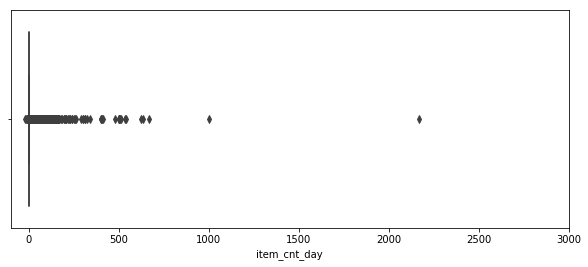

In [36]:
plt.figure(figsize=(10,4))
plt.xlim(-100,3000)
sns.boxplot(x=train.item_cnt_day)

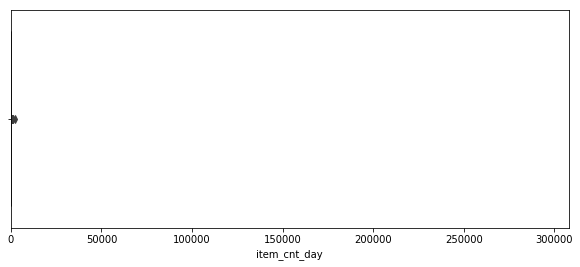

In [37]:
plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min()-100, train.item_price.max())
sns.boxplot(x=train.item_cnt_day)

In [38]:
train.item_price.min(), train.item_price.max()

(-1.0, 307980.0)

In [39]:
train['item_price'].describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

C:\Users\ankish\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


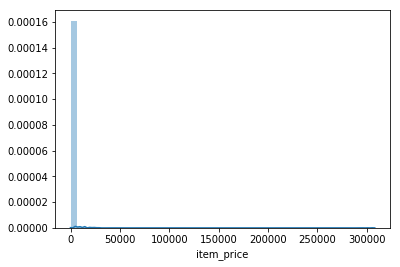

In [40]:
sns.distplot(train['item_price'])

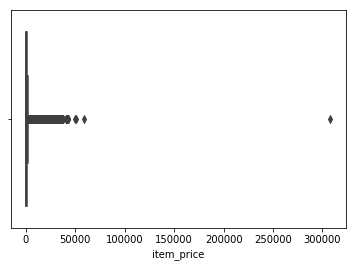

In [41]:
sns.boxplot(train['item_price'])

In [42]:
train.item_price.quantile(.25), train.item_price.quantile(.75)

(249.0, 999.0)

In [ ]:
temp1 = train['item_price']<(249-1.5*750) | train['item_price']>(999+1.5*750)


In [47]:
train['item_price']>(999+1.5*750)

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
2935819    False
2935820    False
2935821    False
2935822     True
2935823    False
2935824    False
2935825    False
2935826    False
2935827    False
2935828    False
2935829    False
2935830    False
2935831    False
2935832    False
2935833    False
2935834    False
2935835    False
2935836    False
2935837    False
2935838    False
2935839    False
2935840    False
2935841    False
2935842    False
2935843    False
2935844    False
2935845    False
2935846    Fal

In [ ]:
train[train['item_price']<(249-1.5*750) and train['item_price']>(999+1.5*750)]

In [46]:
train.shape

(2935849, 6)

In [48]:
per = np.percentile(train.item_price, [5,95])
new_train = train[train.item_price>per[0] & train.item_price<per[1]]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [ ]:
temp1 = train['item_price']>(999+1.5*750)

In [49]:
train = train[train.item_price<100000]

In [50]:
train = train[train.item_cnt_day<1000]

In [51]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935846e+06,2.935846e+06,2.935846e+06,2.935846e+06,2.935846e+06
mean,1.456990e+01,3.300175e+01,1.019722e+04,8.907492e+02,1.241562e+00
std,9.422985e+00,1.622697e+01,6.324297e+03,1.720491e+03,2.217636e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,5.920000e+04,6.690000e+02


In [52]:
train.loc[train.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [53]:
#shops/categories/items preprocessing
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])
shops = shops[['shop_id', 'city_code']]


In [56]:
shops.head()

,shop_id,city_code
0,0,0
1,1,0
2,2,1
3,3,2
4,4,3


In [57]:
cat.head()

NameError: name 'cat' is not defined

In [58]:
items_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [59]:
items_category['split'] = items_category['item_category_name'].str.split('-')
items_category['type'] = items_category['split'].map(lambda x:x[0].strip())
items_category['type_code'] = LabelEncoder().fit_transform(items_category['type'])

items_category['subtype'] = items_category['split'].map(lambda x:x[1].strip() \
                                                       if len(x)>1 else x[0].strip())
items_category['subtype_code'] = LabelEncoder().fit_transform(items_category['subtype'])
items_category = items_category[['item_category_id', 'type_code', 'subtype_code']]

In [60]:
items_category.head()

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


In [61]:
items_new.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [62]:
items_new.drop(['item_name'], axis=1, inplace=True)

In [63]:
items_new.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


In [64]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [65]:
test.describe() #it constains 5100 items and 42 shops

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [66]:
# calculate new items in test set compared to train set. So corresponding value will be zero.
print('New Items in test set: ',len(list(set(test.item_id) - set(test.item_id).intersection(set(train.item_id)))))
print('Total Items in test set: ', len(list(set(test.item_id))))
print('toal items ad shops: ', len(test))

New Items in test set:  363
Total Items in test set:  5100
toal items ad shops:  214200


In [67]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [68]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [69]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y') 

In [70]:
print('total month: ', (train.date_block_num.max() - train.date_block_num.min() + 1))#total 34 month

total month:  34


In [71]:
from itertools import product
'''
num_data = [1,2,3]
alpha_data = ['a', 'b', 'c']

results = itertools.product(num_data, alpha_data)

(1, 'a')
(1, 'b')
(1, 'c')
(2, 'a')
- --- ----- -- --
'''

"\nnum_data = [1,2,3]\nalpha_data = ['a', 'b', 'c']\n\nresults = itertools.product(num_data, alpha_data)\n\n(1, 'a')\n(1, 'b')\n(1, 'c')\n(2, 'a')\n- --- ----- -- --\n"

In [72]:
matrix = []
cols = ['date_block_num', 'shop_id', 'item_id']
for i in range(34):
    sales = train[train.date_block_num == i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16')    

SyntaxError: unexpected EOF while parsing (<ipython-input-72-ee86263b7b39>, line 5)

In [73]:
median = train[(train.shop_id==32)&(train.item_id==2973)&(train.date_block_num==4)&(train.item_price>0)].item_price.median()
train.loc[train.item_price<0, 'item_price'] = median

In [74]:
# Якутск Орджоникидзе, 56
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

In [75]:
matrix = []
cols = ['date_block_num','shop_id','item_id']
for i in range(34):
    sales = train[train.date_block_num==i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))

In [76]:
len(matrix)

34

In [77]:
matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.head()

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


In [78]:
matrix = []
cols = ['date_block_num','shop_id','item_id']
for i in range(34):
    sales = train[train.date_block_num==i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))
    
matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols,inplace=True)

In [79]:
matrix # imp point to note that it make pairs between each item_id and each shop_id

,date_block_num,shop_id,item_id
114910,0,2,19
117150,0,2,27
120623,0,2,28
118316,0,2,29
114602,0,2,32
114603,0,2,33
114604,0,2,34
114902,0,2,35
118327,0,2,40
117720,0,2,41


In [80]:
'''
I use floats instead of ints for item_cnt_month to avoid downcasting it after concatination 
with the test set later. If it would be int16, after concatination with NaN values it becomes 
int64, but foat16 becomes float16 even with NaNs.
'''
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [81]:
train['revenue'] = train['item_price']*train['item_cnt_day']

In [82]:
train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': ['sum']}).head()

item_cnt_day
                                        sum
date_block_num shop_id item_id             
0              2       27               1.0
                       33               1.0
                       317              1.0
                       438              1.0
                       471              2.0

In [83]:
group = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': ['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)


In [84]:
'''
Aggregate train set by shop/item pairs to calculate target aggreagates, then clip(0,20) target value. 
This way train target will be similar to the test predictions.
'''
matrix = pd.merge(matrix, group, on=cols, how='left') #along the common first index
matrix['item_per_month'] = matrix['item_cnt_month'].fillna(0).clip(0,20).astype(np.float16)

In [85]:
matrix['item_cnt_month'].min()

-22.0